## About Dataset
The dataset is generated from a deep learning model trained on the Obesity or CVD risk dataset.
The original Obesity or CVD risk dataset consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition .

The attributes related with eating habits are:
- Frequent consumption of high caloric food (FAVC), 
- Frequency of consumption of vegetables (FCVC), 
- Number of main meals (NCP), 
- Consumption of food between meals (CAEC), 
- Consumption of water daily (CH20), 
- Consumption of alcohol (CALC).

The attributes related with the physical condition are: 
- Calories consumption monitoring (SCC), 
- Physical activity frequency (FAF), 
- Time using technology devices (TUE), 
- Transportation used (MTRANS)
  
 Others:
 - family_history_with_overweight
 - SMOKE

variables obtained :
- Gender, Age, Height and Weight


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('fivethirtyeight')
sns.set_theme(style="whitegrid")

In [3]:
train = pd.read_csv('train.csv')
orginal = pd.read_csv('ObesityDataSet.csv')

### Data Overview and Quality Check

In [4]:
train.head(10)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
5,5,Male,18.128249,1.748524,51.552595,yes,yes,2.919751,3.000000,Sometimes,no,2.137550,no,1.930033,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
6,6,Male,29.883021,1.754711,112.725005,yes,yes,1.991240,3.000000,Sometimes,no,2.000000,no,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II
7,7,Male,29.891473,1.750150,118.206565,yes,yes,1.397468,3.000000,Sometimes,no,2.000000,no,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II
8,8,Male,17.000000,1.700000,70.000000,no,yes,2.000000,3.000000,Sometimes,no,3.000000,yes,1.000000,1.000000,no,Public_Transportation,Overweight_Level_I
9,9,Female,26.000000,1.638836,111.275646,yes,yes,3.000000,3.000000,Sometimes,no,2.632253,no,0.000000,0.218645,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
train.sample(5)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory
1871,1871,Male,30.870724,1.699474,100.088468,yes,yes,2.938616,2.175153,Sometimes,no,1.000000,no,0.949976,1.506576,no,Public_Transportation,Obesity_Type_II
12157,12157,Male,18.000000,1.780000,52.000000,no,yes,3.000000,3.000000,Frequently,no,2.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
8310,8310,Female,18.086772,1.633675,78.967919,yes,yes,2.000000,2.743277,Sometimes,no,1.023328,no,0.000000,1.556052,no,Public_Transportation,Overweight_Level_I
5362,5362,Male,17.000000,1.809251,59.209450,yes,yes,2.000000,3.000000,Sometimes,no,2.976177,no,2.429923,0.000000,no,Automobile,Insufficient_Weight
6661,6661,Male,19.633898,1.804099,85.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,1.295759,0.000000,no,Public_Transportation,Overweight_Level_I


In [6]:
train.tail()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory
15528,15528,Male,18.000000,1.700000,50.000000,no,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,2.000000,Sometimes,Public_Transportation,Insufficient_Weight
15529,15529,Male,18.000000,1.763101,55.523481,yes,yes,2.786008,3.000000,Sometimes,no,1.962646,yes,0.028202,1.561272,Sometimes,Public_Transportation,Insufficient_Weight
15530,15530,Female,19.010211,1.686936,49.660995,no,yes,1.053534,3.452590,Sometimes,no,1.000000,no,2.001230,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
15531,15531,Male,22.777890,1.805445,85.228116,yes,yes,2.000000,2.092179,Sometimes,no,2.452986,no,0.796770,0.000000,Sometimes,Public_Transportation,Overweight_Level_I
15532,15532,Male,39.371523,1.770278,79.677930,yes,yes,2.407817,1.097312,Sometimes,no,2.205911,no,0.977929,0.000000,Frequently,Automobile,Overweight_Level_II


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15533 entries, 0 to 15532
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15533 non-null  int64  
 1   Gender                          15533 non-null  object 
 2   Age                             15533 non-null  float64
 3   Height                          15533 non-null  float64
 4   Weight                          15533 non-null  float64
 5   family_history_with_overweight  15533 non-null  object 
 6   FAVC                            15533 non-null  object 
 7   FCVC                            15533 non-null  float64
 8   NCP                             15533 non-null  float64
 9   CAEC                            15533 non-null  object 
 10  SMOKE                           15533 non-null  object 
 11  CH2O                            15533 non-null  float64
 12  SCC                             

In [8]:
train.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
WeightCategory                    0
dtype: int64

In [9]:
train[train.duplicated(subset='id')]

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory


In [10]:
train.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,15533.000000,15533.000000,15533.000000,15533.000000,15533.000000,15533.000000,15533.000000,15533.000000,15533.000000
mean,7766.000000,23.816308,1.699918,87.785225,2.442917,2.760425,2.027626,0.976968,0.613813
std,4484.135201,5.663167,0.087670,26.369144,0.530895,0.706463,0.607733,0.836841,0.602223
min,0.000000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,3883.000000,20.000000,1.630927,66.000000,2.000000,3.000000,1.796257,0.007050,0.000000
50%,7766.000000,22.771612,1.700000,84.000000,2.342220,3.000000,2.000000,1.000000,0.566353
75%,11649.000000,26.000000,1.762921,111.600553,3.000000,3.000000,2.531456,1.582675,1.000000
max,15532.000000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [11]:
#Age is showing sudden increase from 75% to max. checking to see those are valid informations or not
train.sort_values(by='Age', ascending=False)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory
10274,10274,Male,61.000000,1.750000,76.000000,yes,no,2.0,3.0,Frequently,no,2.0,no,2.000000,1.000000,Frequently,Automobile,Overweight_Level_I
5646,5646,Male,61.000000,1.750000,79.000000,yes,yes,3.0,3.0,Sometimes,no,2.0,no,2.000000,0.000000,Sometimes,Automobile,Overweight_Level_I
11463,11463,Male,56.000000,1.650000,80.000000,yes,yes,3.0,3.0,Sometimes,no,2.0,no,0.000000,0.000000,no,Automobile,Overweight_Level_II
12645,12645,Male,55.493687,1.681021,80.469928,yes,yes,2.0,1.0,Sometimes,no,2.0,no,0.784216,0.000000,no,Automobile,Overweight_Level_II
56,56,Male,55.272573,1.700000,80.000000,yes,yes,3.0,3.0,Sometimes,no,2.0,no,0.979701,1.544357,no,Automobile,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6343,6343,Male,15.000000,1.800000,58.000000,no,yes,2.0,3.0,Frequently,no,2.0,no,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
924,924,Male,15.000000,1.750000,72.000000,yes,yes,2.0,3.0,Sometimes,no,2.0,no,3.000000,0.000000,Sometimes,Walking,Normal_Weight
3226,3226,Male,14.000000,1.730000,72.000000,yes,yes,3.0,3.0,Sometimes,no,3.0,no,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
2430,2430,Male,14.000000,1.830000,71.000000,yes,yes,3.0,3.0,Sometimes,no,2.0,no,3.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight


### Conclusions

**Completeness**  
- No missing data  

**Messy data**  
- Didn't find any messy data  

**Validity**  
- All data found to be valid.  

**Accuracy**    
- Number of main meals (NCP) can't be a decimal — convert to integer  
- Consumption of water daily (CH20) more integer values noted 
- Physical activity frequency (FAF) more integer values noted  
- Time using technology devices (TUE) more integer values noted  

**Consistency**  
- Data found to be consistent. 


### Intitial Data Cleaning

In [12]:
#taking copy of dataframe
train_df = train.copy()

Number of main meals(NCP) rounded off to integer.

In [13]:
train_df['NCP'] = train_df['NCP'].round().astype(int)

In [14]:
train_df['NCP']

0        3
1        3
2        1
3        3
4        2
        ..
15528    3
15529    3
15530    3
15531    2
15532    1
Name: NCP, Length: 15533, dtype: int64

In [15]:
train_df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,3,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,2,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


## Exploratory Data Analysis (EDA)

**Numerical Features**
- Age, Height, Weight, FAF , TUE ,FCVC,CH2O.

**Categorical Features**
   - family_history_with_overweight,FAVC ,   NCP, CAEC	, SMOKE	, SCC , FAF , TUE ,CALC , MTRANS, WeightCategory.

'id' column not included.

### Univariate Analysis

#### 1. WeightCategory(Target Variable)

In [16]:
train_df['WeightCategory'].value_counts()

WeightCategory
Obesity_Type_III       2983
Obesity_Type_II        2403
Normal_Weight          2345
Obesity_Type_I         2207
Overweight_Level_II    1881
Insufficient_Weight    1870
Overweight_Level_I     1844
Name: count, dtype: int64

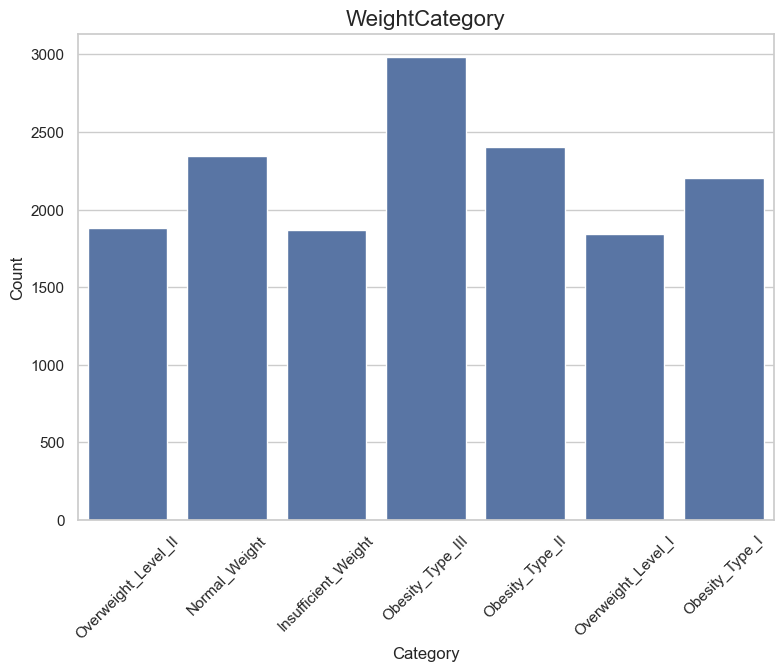

In [17]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=train_df, x='WeightCategory')
ax.set_title('WeightCategory', fontsize=16)
ax.set_xlabel('Category', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.tick_params(axis='x', rotation=45)

plt.show()

**conclusion**
- No missing values.
- All the categories have an almost equal distribution of data. Since we are predicting the weight category, we have a balanced dataset in hand.

#### 2. Age

In [18]:
train_df['Age'].describe()

count    15533.000000
mean        23.816308
std          5.663167
min         14.000000
25%         20.000000
50%         22.771612
75%         26.000000
max         61.000000
Name: Age, dtype: float64

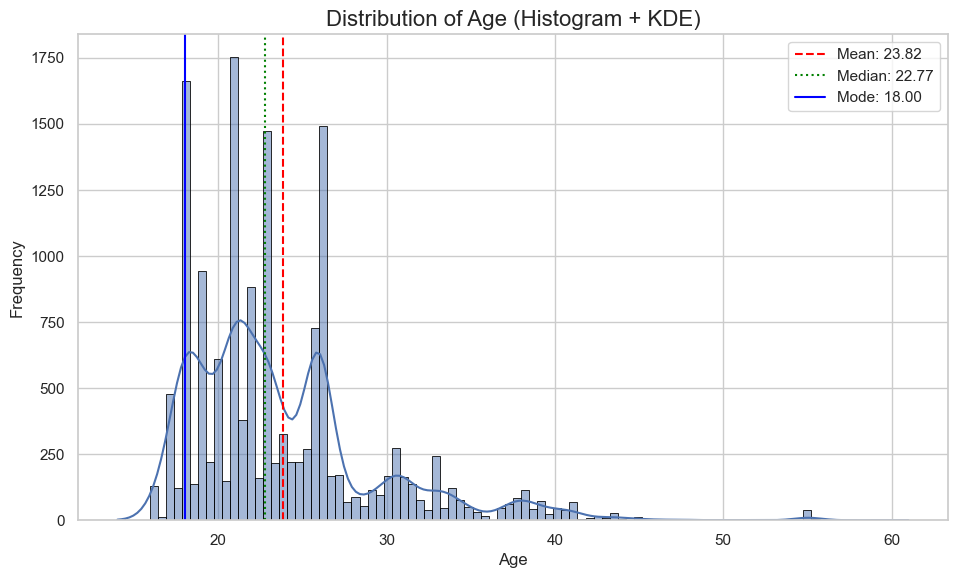

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='Age', kde=True, edgecolor='black')
plt.axvline(train_df['Age'].mean(), color='red', linestyle='--', label=f'Mean: {train_df["Age"].mean():.2f}')
plt.axvline(train_df['Age'].median(), color='green', linestyle=':', label=f'Median: {train_df["Age"].median():.2f}')
plt.axvline(train_df['Age'].mode().iloc[0], color='blue', linestyle='-', label=f'Mode: {train_df["Age"].mode().iloc[0]:.2f}')

plt.title('Distribution of Age (Histogram + KDE)', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()

plt.show()

In [20]:
train_df['Age'].skew()

np.float64(1.5719762764842427)

<Axes: >

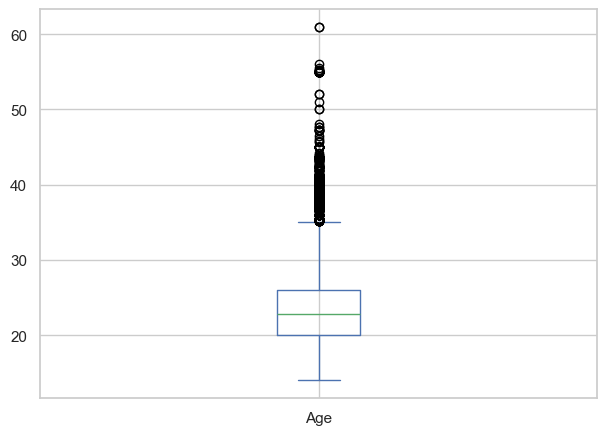

In [21]:
train_df['Age'].plot(kind='box')

In [22]:
train_df[train_df['Age']>35].sort_values(by='Age', ascending=False)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory
5646,5646,Male,61.000000,1.750000,79.000000,yes,yes,3.000000,3,Sometimes,no,2.000000,no,2.000000,0.000000,Sometimes,Automobile,Overweight_Level_I
10274,10274,Male,61.000000,1.750000,76.000000,yes,no,2.000000,3,Frequently,no,2.000000,no,2.000000,1.000000,Frequently,Automobile,Overweight_Level_I
11463,11463,Male,56.000000,1.650000,80.000000,yes,yes,3.000000,3,Sometimes,no,2.000000,no,0.000000,0.000000,no,Automobile,Overweight_Level_II
12645,12645,Male,55.493687,1.681021,80.469928,yes,yes,2.000000,1,Sometimes,no,2.000000,no,0.784216,0.000000,no,Automobile,Overweight_Level_II
56,56,Male,55.272573,1.700000,80.000000,yes,yes,3.000000,3,Sometimes,no,2.000000,no,0.979701,1.544357,no,Automobile,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4413,4413,Female,35.194089,1.673482,73.193589,yes,no,3.000000,3,Sometimes,no,1.572371,no,1.806740,0.000000,Sometimes,Automobile,Overweight_Level_I
2064,2064,Female,35.194089,1.679515,79.668320,yes,yes,2.444599,1,Sometimes,no,1.000000,no,0.178023,0.000000,no,Automobile,Overweight_Level_I
7392,7392,Male,35.194089,1.700000,83.000000,no,yes,3.000000,3,Sometimes,no,2.967064,no,1.000000,0.000000,Sometimes,Automobile,Overweight_Level_I
10449,10449,Male,35.194089,1.703317,83.016968,no,yes,2.996717,3,Sometimes,no,1.705633,no,0.987591,0.763990,Sometimes,Automobile,Overweight_Level_I


**conclusion**
- Age distribution is positively skewed.
- No missing values
- The mean age is around 24
- There are many outliers of age > 35, on analysing found to be real data.

#### 3. Height

In [23]:
train_df['Height'].describe()

count    15533.000000
mean         1.699918
std          0.087670
min          1.450000
25%          1.630927
50%          1.700000
75%          1.762921
max          1.975663
Name: Height, dtype: float64

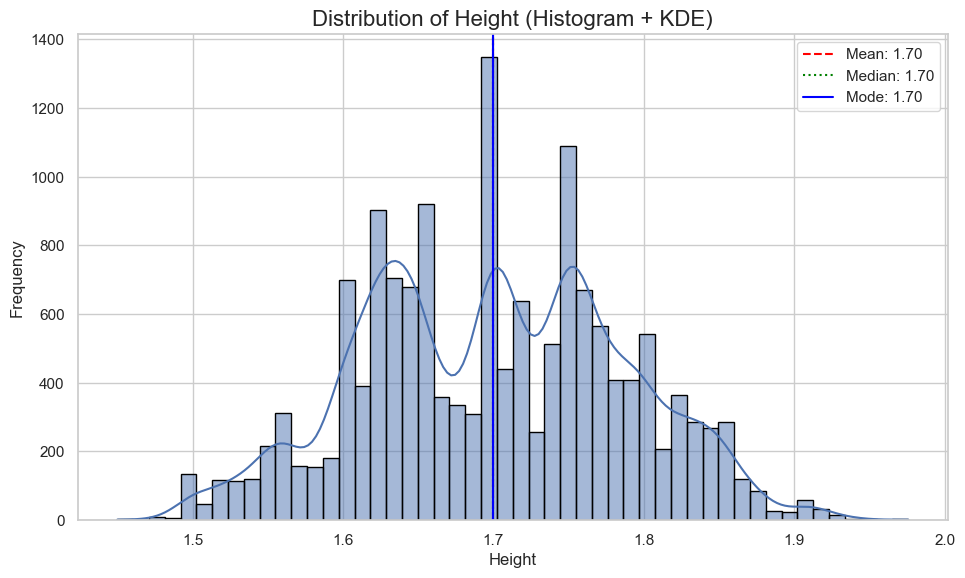

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='Height', kde=True, edgecolor='black')
plt.axvline(train_df['Height'].mean(), color='red', linestyle='--', label=f"Mean: {train_df['Height'].mean():.2f}")
plt.axvline(train_df['Height'].median(), color='green', linestyle=':', label=f"Median: {train_df['Height'].median():.2f}")
plt.axvline(train_df['Height'].mode().iloc[0], color='blue', linestyle='-', label=f"Mode: {train_df['Height'].mode().iloc[0]:.2f}")

plt.title('Distribution of Height (Histogram + KDE)', fontsize=16)
plt.xlabel('Height', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()

plt.show()

In [27]:
train_df['Height'].skew()

np.float64(0.01000144028875558)

<Axes: >

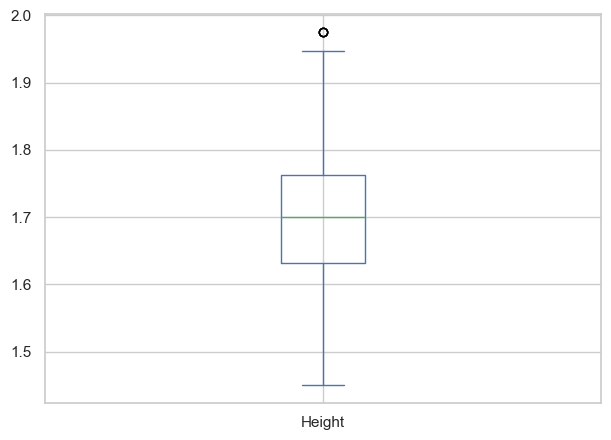

In [28]:
train_df['Height'].plot(kind='box')

In [29]:
train_df[train_df['Height']>1.9].sort_values(by='Height', ascending=False)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory
1271,1271,Male,30.717727,1.975663,125.117633,yes,yes,2.955300,3,Sometimes,yes,1.000000,no,0.922014,0.000000,Sometimes,Public_Transportation,Obesity_Type_II
7272,7272,Male,30.702559,1.975663,120.775439,yes,yes,2.176317,3,Sometimes,no,2.224164,no,1.487987,1.441605,Sometimes,Automobile,Obesity_Type_II
4084,4084,Male,20.491475,1.975663,53.783977,yes,yes,2.000000,3,Sometimes,no,2.000000,no,0.767013,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
11718,11718,Male,18.000000,1.975663,108.413119,yes,yes,2.000000,2,Sometimes,no,3.000000,no,1.066101,0.429081,no,Public_Transportation,Obesity_Type_I
4220,4220,Male,30.796260,1.947406,118.332966,yes,yes,1.893428,1,Sometimes,no,2.000000,no,0.704236,1.000000,Sometimes,Automobile,Obesity_Type_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14554,14554,Male,30.200946,1.908608,129.679131,yes,yes,2.765063,3,Sometimes,no,1.957871,no,0.769709,0.658783,Sometimes,Public_Transportation,Obesity_Type_II
11428,11428,Male,20.670975,1.906821,121.657979,yes,yes,2.000000,3,Sometimes,no,1.791286,no,0.742113,0.000000,Sometimes,Public_Transportation,Obesity_Type_II
6931,6931,Male,29.633715,1.903832,129.194490,yes,yes,2.200588,3,Sometimes,no,1.859089,no,1.881761,0.000000,Sometimes,Public_Transportation,Obesity_Type_II
3140,3140,Male,30.796260,1.903832,121.658729,yes,yes,2.497548,3,Sometimes,no,1.701835,no,0.668963,0.000000,Sometimes,Automobile,Obesity_Type_II


**conclusions**
- No missing values
- Curve is bimodal with two peaks at around 1.62 and 1.77
- Skewness almost close to zero.
- Outliers are present. On analysing majority are found to be valid data only except one with id 4084 where the height is 1.98m, but the weight is only
53.78kg, where the persons with similar height have more than double the weight.

#### 4. Weight

In [30]:
train_df['Weight'].describe()

count    15533.000000
mean        87.785225
std         26.369144
min         39.000000
25%         66.000000
50%         84.000000
75%        111.600553
max        165.057269
Name: Weight, dtype: float64

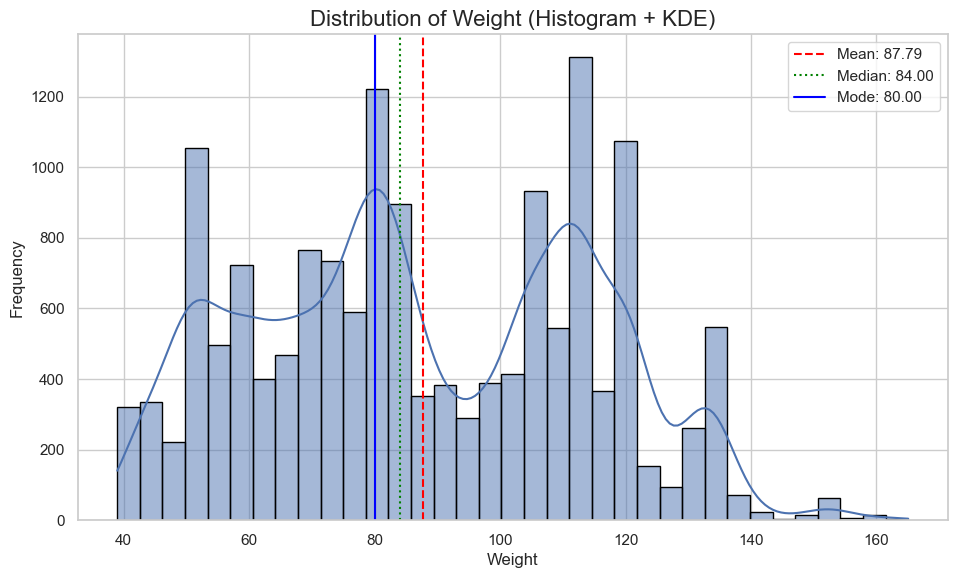

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='Weight', kde=True, edgecolor='black')
plt.axvline(train_df['Weight'].mean(), color='red', linestyle='--', label=f'Mean: {train_df["Weight"].mean():.2f}')
plt.axvline(train_df['Weight'].median(), color='green', linestyle=':', label=f'Median: {train_df["Weight"].median():.2f}')
plt.axvline(train_df['Weight'].mode().iloc[0], color='blue', linestyle='-', label=f'Mode: {train_df["Weight"].mode().iloc[0]:.2f}')

plt.title('Distribution of Weight (Histogram + KDE)', fontsize=16)
plt.xlabel('Weight', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()

plt.show()

In [33]:
train_df['Weight'].skew()

np.float64(0.10855154951871336)

<Axes: >

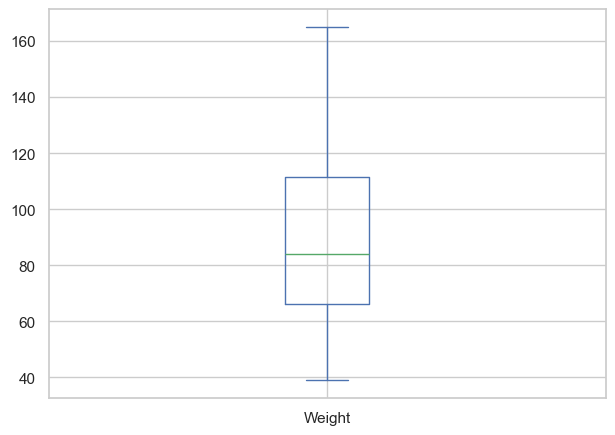

In [34]:
train_df['Weight'].plot(kind='box')

In [35]:
train_df['Weight']

0         81.669950
1         57.000000
2         50.165754
3        131.274851
4         93.798055
            ...    
15528     50.000000
15529     55.523481
15530     49.660995
15531     85.228116
15532     79.677930
Name: Weight, Length: 15533, dtype: float64

**conclusions**
- No missing values.
- The curve is Bimodal with two peaks around 80kg and 110 kg
- No outliers present

#### 5. Frequency of consumption of vegetables (FCVC)

In [36]:
train_df['FCVC'].describe()

count    15533.000000
mean         2.442917
std          0.530895
min          1.000000
25%          2.000000
50%          2.342220
75%          3.000000
max          3.000000
Name: FCVC, dtype: float64

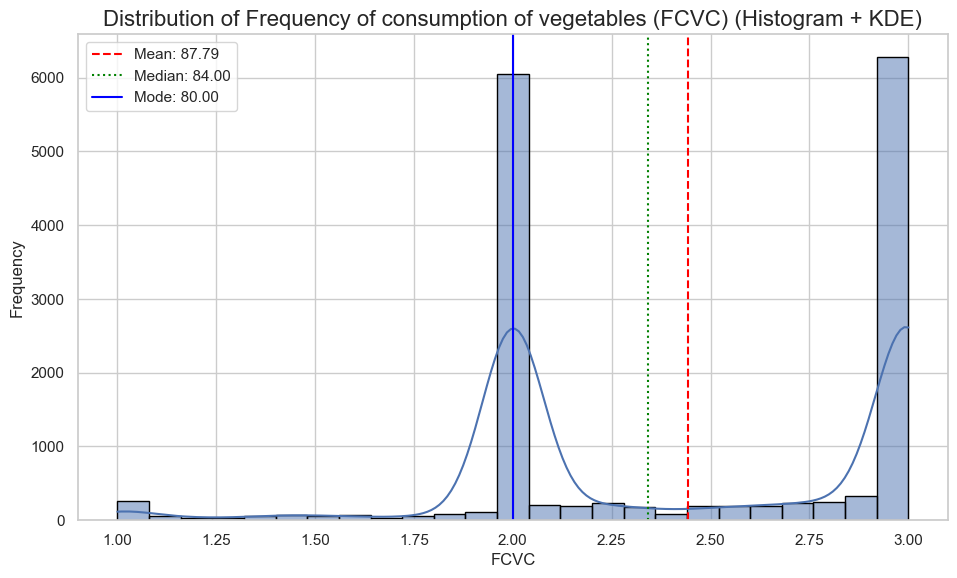

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='FCVC', kde=True, edgecolor='black')
plt.axvline(train_df['FCVC'].mean(), color='red', linestyle='--', label=f'Mean: {train_df["Weight"].mean():.2f}')
plt.axvline(train_df['FCVC'].median(), color='green', linestyle=':', label=f'Median: {train_df["Weight"].median():.2f}')
plt.axvline(train_df['FCVC'].mode().iloc[0], color='blue', linestyle='-', label=f'Mode: {train_df["Weight"].mode().iloc[0]:.2f}')

plt.title('Distribution of Frequency of consumption of vegetables (FCVC) (Histogram + KDE)', fontsize=16)
plt.xlabel('FCVC', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()

plt.show()

***consider roundinoff to 3 categories 1, 2 and 3.***

In [39]:
train_df['FCVC'] = train_df['FCVC'].round()

In [40]:
train_df['CH2O'].describe()

count    15533.000000
mean         2.027626
std          0.607733
min          1.000000
25%          1.796257
50%          2.000000
75%          2.531456
max          3.000000
Name: CH2O, dtype: float64

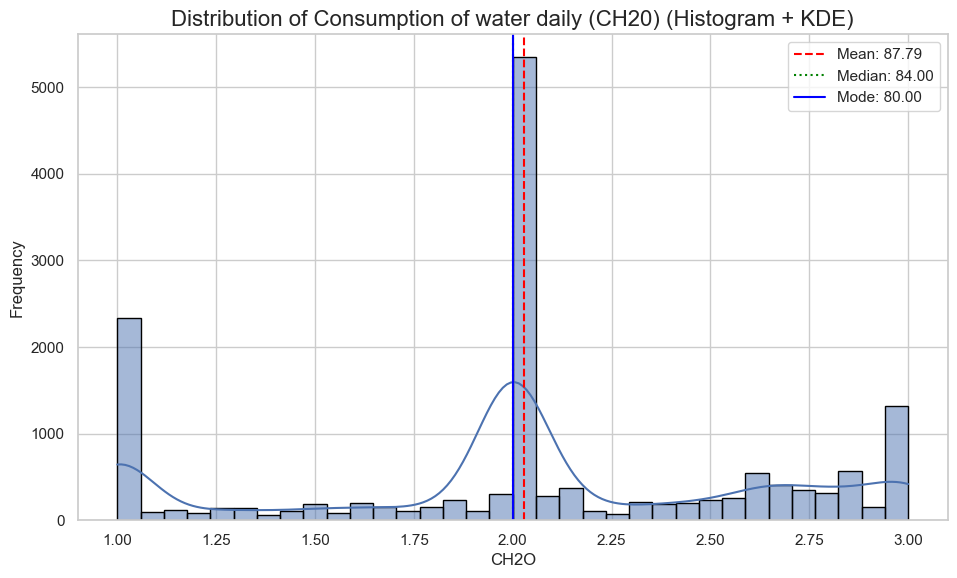

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='CH2O', kde=True, edgecolor='black')
plt.axvline(train_df['CH2O'].mean(), color='red', linestyle='--', label=f'Mean: {train_df["Weight"].mean():.2f}')
plt.axvline(train_df['CH2O'].median(), color='green', linestyle=':', label=f'Median: {train_df["Weight"].median():.2f}')
plt.axvline(train_df['CH2O'].mode().iloc[0], color='blue', linestyle='-', label=f'Mode: {train_df["Weight"].mode().iloc[0]:.2f}')

plt.title('Distribution of Consumption of water daily (CH20) (Histogram + KDE)', fontsize=16)
plt.xlabel('CH2O', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()

plt.show()

**High concentration of values on 1, 2 and 3. Consider rounding off**

In [43]:
train_df['FAF'].describe()

count    15533.000000
mean         0.976968
std          0.836841
min          0.000000
25%          0.007050
50%          1.000000
75%          1.582675
max          3.000000
Name: FAF, dtype: float64

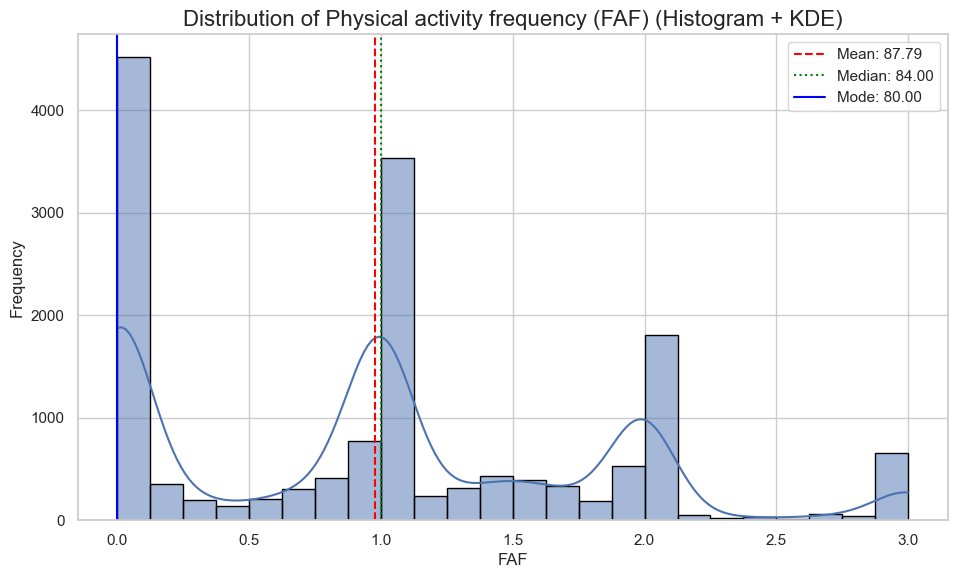

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='FAF', kde=True, edgecolor='black')
plt.axvline(train_df['FAF'].mean(), color='red', linestyle='--', label=f'Mean: {train_df["Weight"].mean():.2f}')
plt.axvline(train_df['FAF'].median(), color='green', linestyle=':', label=f'Median: {train_df["Weight"].median():.2f}')
plt.axvline(train_df['FAF'].mode().iloc[0], color='blue', linestyle='-', label=f'Mode: {train_df["Weight"].mode().iloc[0]:.2f}')

plt.title('Distribution of Physical activity frequency (FAF) (Histogram + KDE)', fontsize=16)
plt.xlabel('FAF', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()

plt.show()

**Can consider roundingoff 0,1,2 and 3.**

In [46]:
train_df['TUE'].describe()

count    15533.000000
mean         0.613813
std          0.602223
min          0.000000
25%          0.000000
50%          0.566353
75%          1.000000
max          2.000000
Name: TUE, dtype: float64

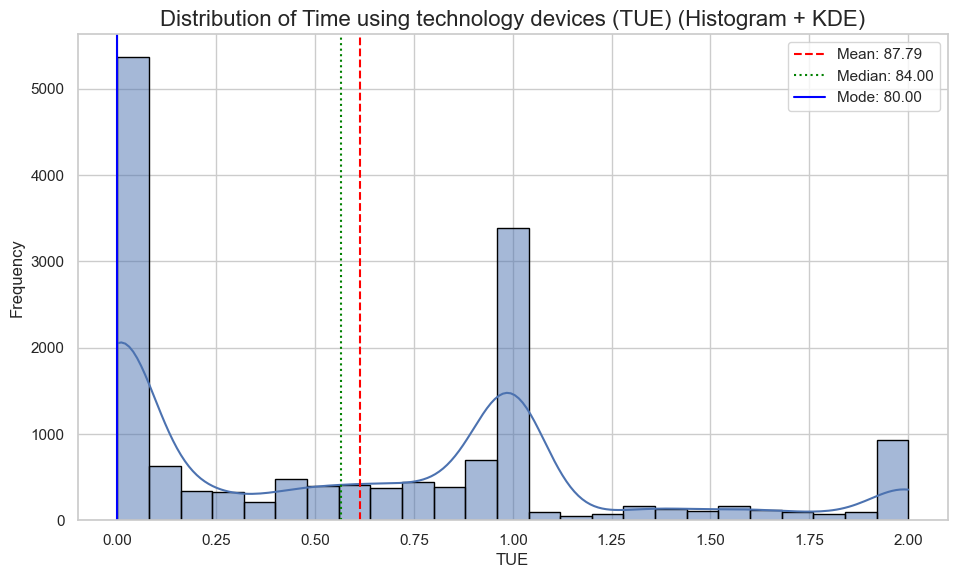

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='TUE', kde=True, edgecolor='black')
plt.axvline(train_df['TUE'].mean(), color='red', linestyle='--', label=f'Mean: {train_df["Weight"].mean():.2f}')
plt.axvline(train_df['TUE'].median(), color='green', linestyle=':', label=f'Median: {train_df["Weight"].median():.2f}')
plt.axvline(train_df['TUE'].mode().iloc[0], color='blue', linestyle='-', label=f'Mode: {train_df["Weight"].mode().iloc[0]:.2f}')

plt.title('Distribution of Time using technology devices (TUE) (Histogram + KDE)', fontsize=16)
plt.xlabel('TUE', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()

plt.show()

**Consider roundoff to intergers**

Frequency of consumption of vegetables(FCVC) rounded off to integer.

In [50]:
train_df['FCVC'] = train_df['FCVC'].round().astype(int)

In [51]:
train_df['FCVC']

0        2
1        2
2        2
3        3
4        3
        ..
15528    2
15529    3
15530    1
15531    2
15532    2
Name: FCVC, Length: 15533, dtype: int64

Consumption of water daily(CH2O) rounded off to integer.

In [52]:
train_df['CH2O'] = train_df['CH2O'].round().astype(int)

In [53]:
train_df['CH2O']

0        3
1        2
2        2
3        2
4        2
        ..
15528    2
15529    2
15530    1
15531    2
15532    2
Name: CH2O, Length: 15533, dtype: int64

Physical activity frequency(FAF) rounded off to integer.

In [54]:
train_df['FAF'] = train_df['FAF'].round().astype(int)

In [55]:
train_df['FAF']

0        0
1        1
2        1
3        1
4        2
        ..
15528    1
15529    0
15530    2
15531    1
15532    1
Name: FAF, Length: 15533, dtype: int64

Time using technology devices(TUE) rounded off to integer.

In [56]:
train_df['TUE'] = train_df['TUE'].round().astype(int)

In [57]:
train_df['TUE']

0        1
1        1
2        2
3        1
4        1
        ..
15528    2
15529    2
15530    1
15531    0
15532    0
Name: TUE, Length: 15533, dtype: int64

In [58]:
train_df['Gender'].value_counts()

Gender
Male      7783
Female    7750
Name: count, dtype: int64

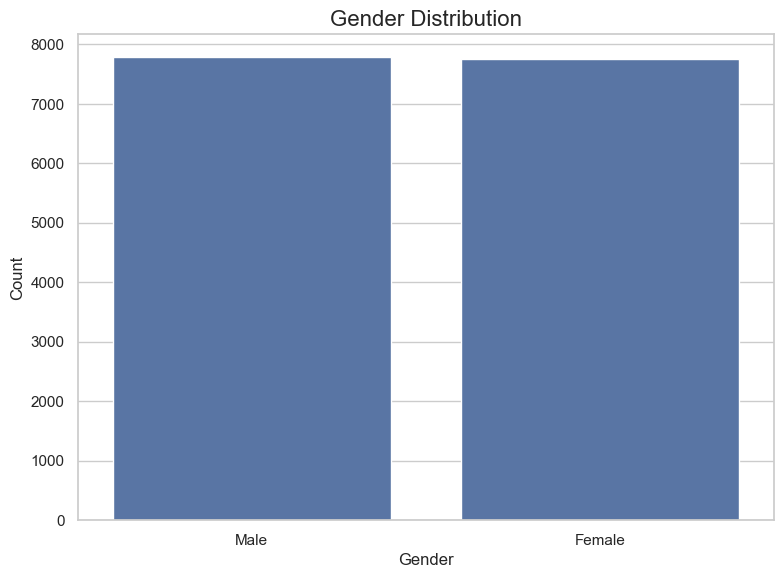

In [59]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=train_df, x='Gender')
ax.set_title('Gender Distribution', fontsize=16)
ax.set_xlabel('Gender', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

plt.show()

In [60]:
train_df['family_history_with_overweight'].value_counts()

family_history_with_overweight
yes    12696
no      2837
Name: count, dtype: int64

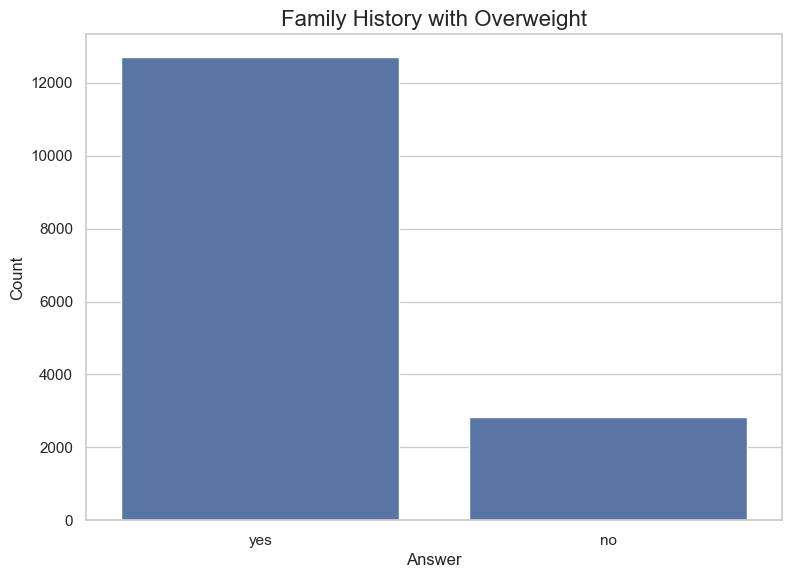

In [61]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=train_df, x='family_history_with_overweight')
ax.set_title('Family History with Overweight', fontsize=16)
ax.set_xlabel('Answer', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

plt.show()

**conclusion**
- No missing values.
- Majority of entries in the dataset have family history with overweight.

#### 6. Frequent consumption of high caloric food (FAVC)

In [62]:
train_df['FAVC'].value_counts()

FAVC
yes    14184
no      1349
Name: count, dtype: int64

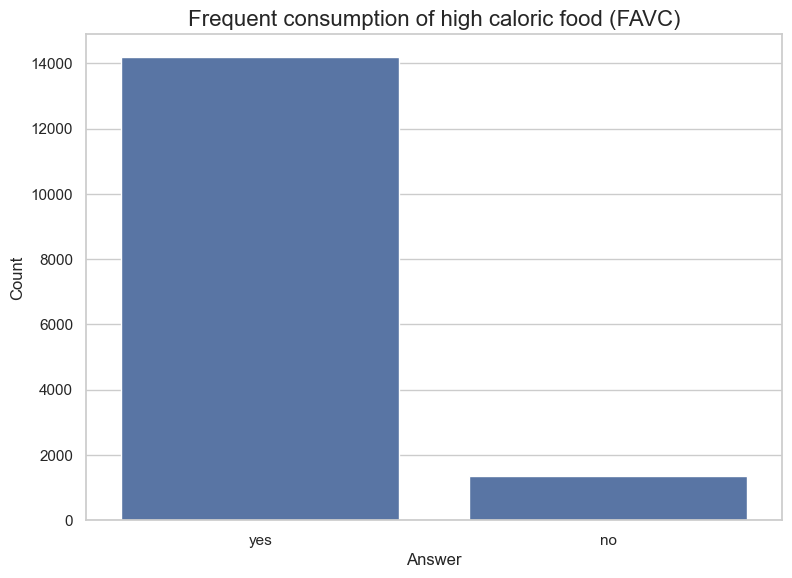

In [63]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=train_df, x='FAVC')
ax.set_title('Frequent consumption of high caloric food (FAVC)', fontsize=16)
ax.set_xlabel('Answer', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

plt.show()

**conclusion**
- No missing values.
- Majority of entries in the dataset Frequent consume high caloric food (FAVC).

#### 7. Frequency of consumption of vegetables (FCVC)

In [64]:
train_df['FCVC'].value_counts()

FCVC
2    7507
3    7483
1     543
Name: count, dtype: int64

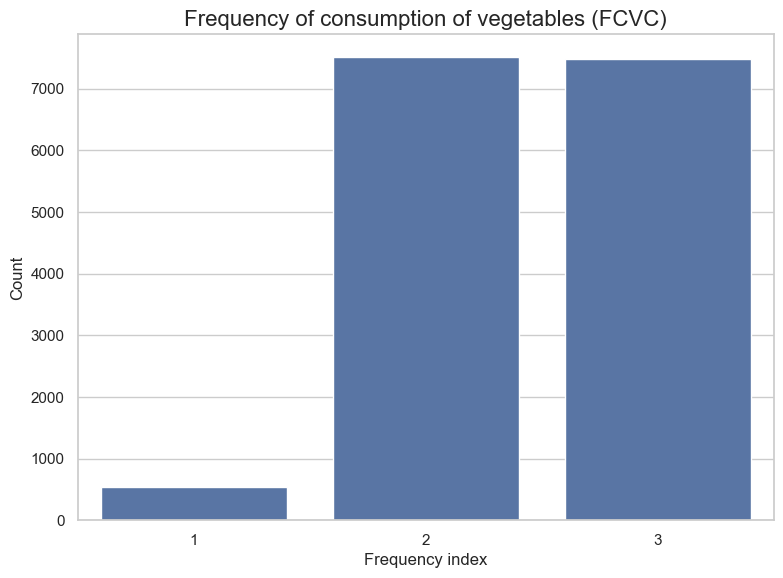

In [65]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=train_df, x='FCVC')
ax.set_title('Frequency of consumption of vegetables (FCVC)', fontsize=16)
ax.set_xlabel('Frequency index', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

plt.show()

**conclusion**
- No missing values.
- Number of entries with frquency index 2 and 3 is almost same. Entires with index 1 is very few(under 600).

#### 8. Number of main meals (NCP)

In [66]:
train_df['NCP'].value_counts()

NCP
3    12210
1     1887
4      773
2      663
Name: count, dtype: int64

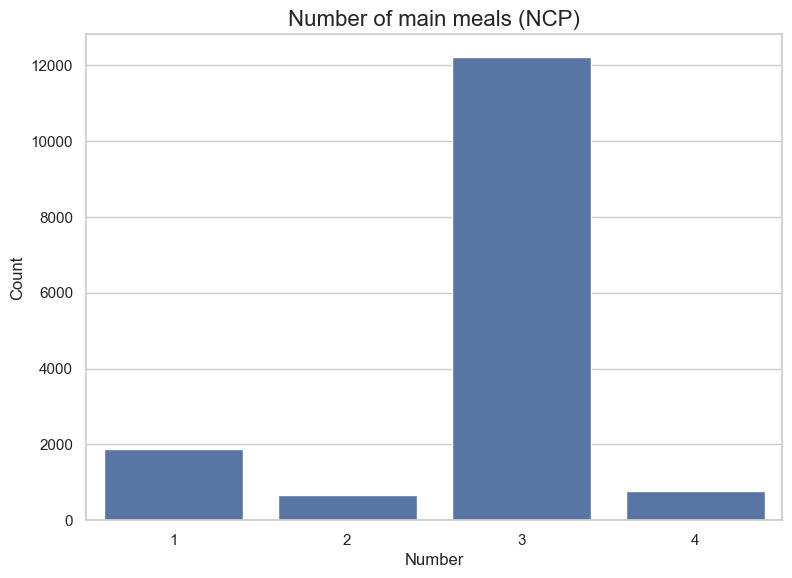

In [67]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=train_df, x='NCP')
ax.set_title('Number of main meals (NCP)', fontsize=16)
ax.set_xlabel('Number', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

plt.show()

**conclusion**
- No missing values.
- Majority of the entries have 3 main meals, followed by 1. Those having 2 and 4 are under 800.

#### 9. Consumption of food between meals (CAEC)

In [68]:
train_df['CAEC'].value_counts()

CAEC
Sometimes     13126
Frequently     1858
Always          346
no              203
Name: count, dtype: int64

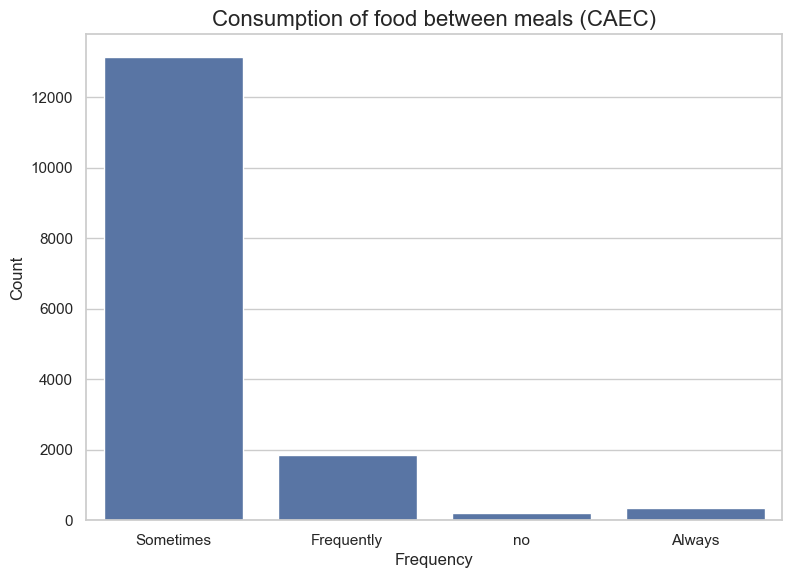

In [69]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=train_df, x='CAEC')
ax.set_title('Consumption of food between meals (CAEC)', fontsize=16)
ax.set_xlabel('Frequency', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

plt.show()

**conclusion**
- No missing values.
- Majority of the entries is sometimes, followed by frequently. Those having no and always are under 350.

#### 10. SMOKE

In [70]:
train_df['SMOKE'].value_counts()

SMOKE
no     15356
yes      177
Name: count, dtype: int64

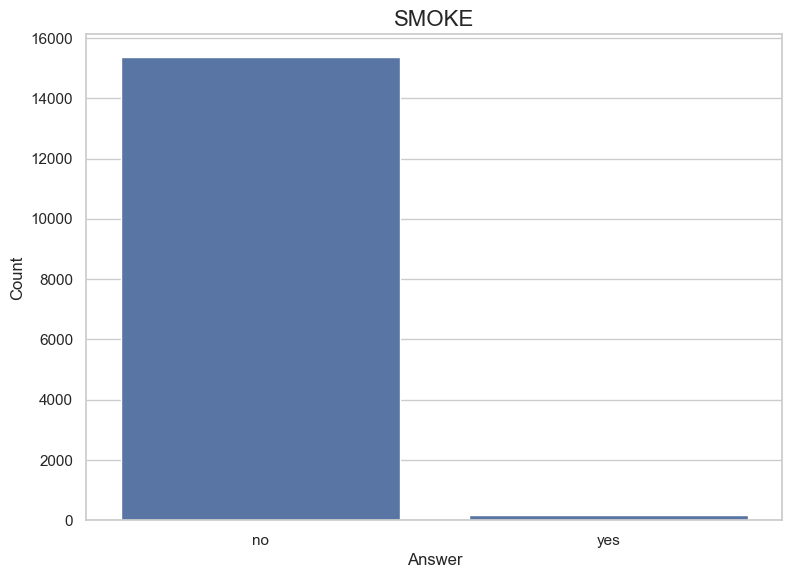

In [71]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=train_df, x='SMOKE')
ax.set_title('SMOKE', fontsize=16)
ax.set_xlabel('Answer', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

plt.show()

**conclusion**
- No missing values.
- Majority of the entries answered no. Highly imbalanced feature.

#### 11. Consumption of water daily (CH20)

In [72]:
train_df['CH2O'].value_counts()

CH2O
2    8323
3    4022
1    3188
Name: count, dtype: int64

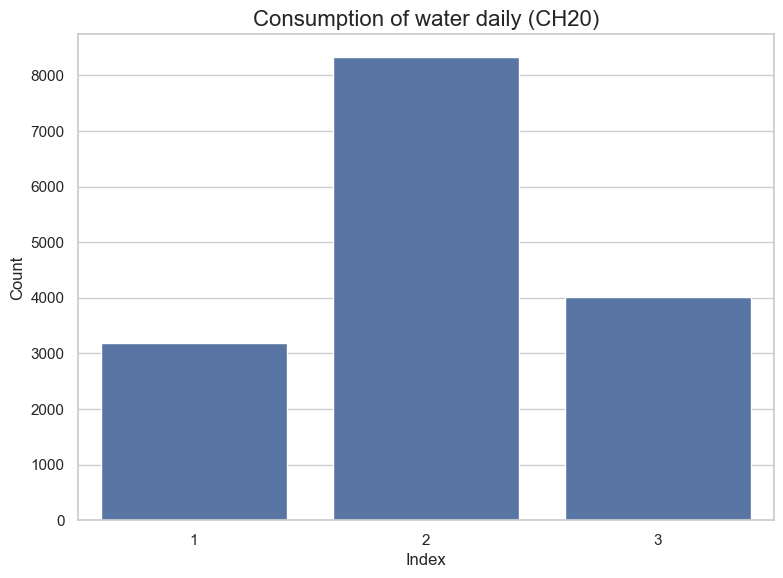

In [73]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=train_df, x='CH2O')
ax.set_title('Consumption of water daily (CH20)', fontsize=16)
ax.set_xlabel('Index', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

plt.show()

**conclusion**
- No missing values.
- Majority of the entries are 2.

#### 12.  Calories consumption monitoring (SCC)

In [74]:
train_df['SCC'].value_counts()

SCC
no     15019
yes      514
Name: count, dtype: int64

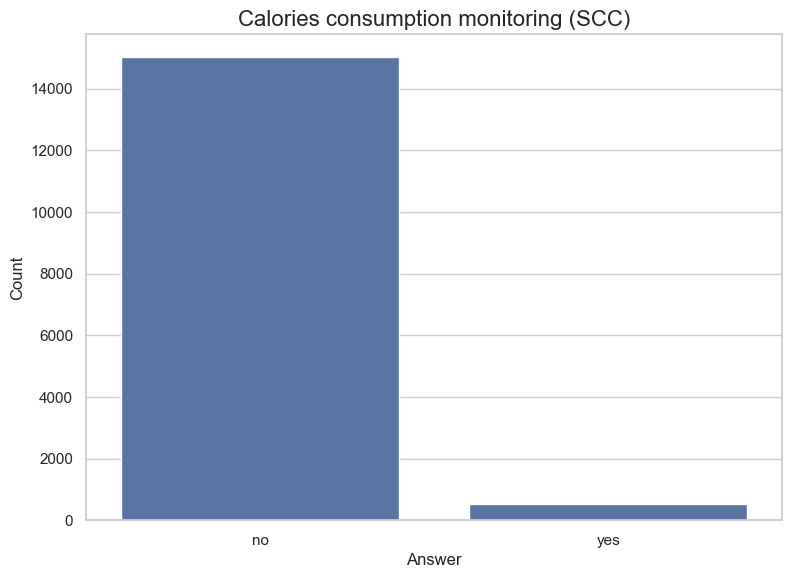

In [75]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=train_df, x='SCC')
ax.set_title('Calories consumption monitoring (SCC)', fontsize=16)
ax.set_xlabel('Answer', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

plt.show()

**conclusion**
- No missing values.
- Majority answerd no. Highly imbalanced data.

#### 13.  Physical activity frequency (FAF)

In [76]:
train_df['FAF'].value_counts()

FAF
1    6211
0    5198
2    3349
3     775
Name: count, dtype: int64

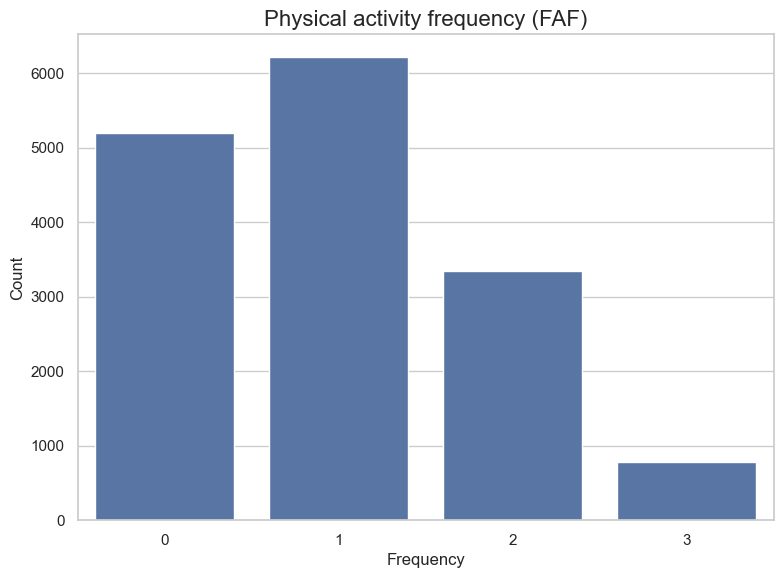

In [77]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=train_df, x='FAF')
ax.set_title('Physical activity frequency (FAF)', fontsize=16)
ax.set_xlabel('Frequency', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

plt.show()

**conclusion**
- No missing values.
- Every frequency rate have enough values. Majority being 1. 

#### 14. Consumption of alcohol (CALC)

In [78]:
train_df['CALC'].value_counts()

CALC
Sometimes     11285
no             3841
Frequently      407
Name: count, dtype: int64

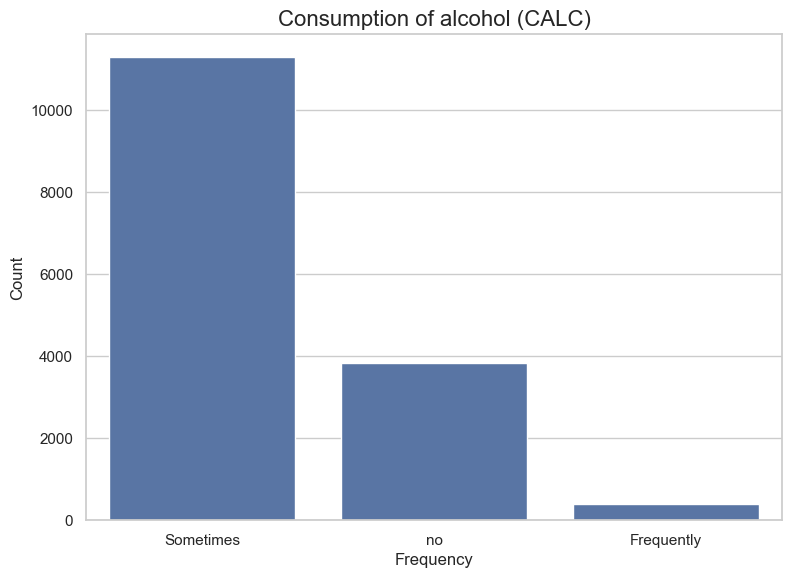

In [79]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=train_df, x='CALC')
ax.set_title('Consumption of alcohol (CALC)', fontsize=16)
ax.set_xlabel('Frequency', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

plt.show()

**conclusion**
- No missing values.
- Majority answered 'Sometimes'. Very few entries in 'Frequently'. 

#### 15.  Time using technology devices (TUE)

In [80]:
train_df['TUE'].value_counts()

TUE
0    7375
1    6651
2    1507
Name: count, dtype: int64

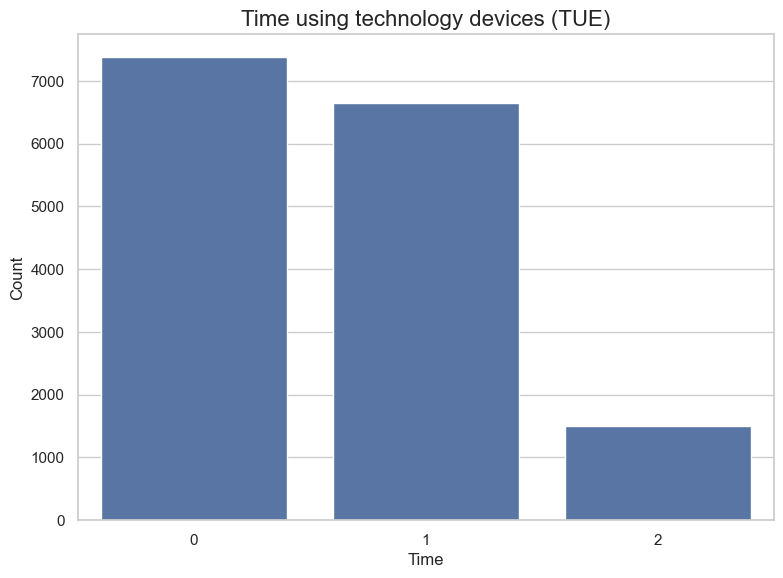

In [81]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=train_df, x='TUE')
ax.set_title('Time using technology devices (TUE)', fontsize=16)
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

plt.show()

#### 16. Transportation used (MTRANS)

In [82]:
train_df['MTRANS'].value_counts()

MTRANS
Public_Transportation    12470
Automobile                2669
Walking                    340
Motorbike                   30
Bike                        24
Name: count, dtype: int64

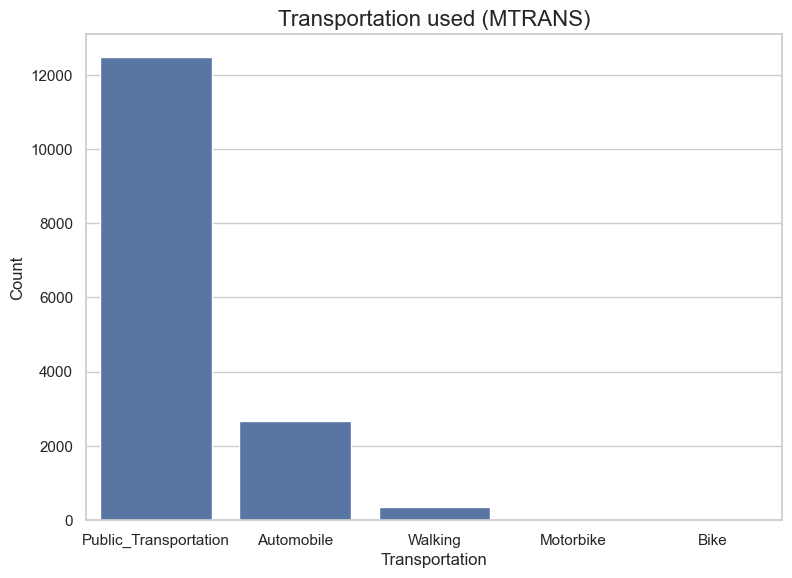

In [83]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=train_df, x='MTRANS')
ax.set_title('Transportation used (MTRANS)', fontsize=16)
ax.set_xlabel('Transportation', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

plt.show()

**conclusion**
- No missing values.
- Majority using public_transporation. People using motorbike and bike are almost nill.  


***From the original 'Obesity or CVD risk dataset', we discovered the weight category is based on a score, which we identified as the
Body Mass Index (BMI). Therefore, we decided to import the original dataset, create a 'BMI' column in both datasets, and analyze.***

In [84]:
original_df = orginal.copy()

In [85]:
original_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [86]:
# Changing the column name from 'NObeyesdad' to 'WeightCategory' 
original_df.rename(columns={'NObeyesdad': 'WeightCategory'}, inplace=True)

In [87]:
original_df.shape

(2111, 17)

In [88]:
original_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [89]:
original_df['WeightCategory'].value_counts()

WeightCategory
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [90]:
train_df['WeightCategory'].value_counts()

WeightCategory
Obesity_Type_III       2983
Obesity_Type_II        2403
Normal_Weight          2345
Obesity_Type_I         2207
Overweight_Level_II    1881
Insufficient_Weight    1870
Overweight_Level_I     1844
Name: count, dtype: int64

In [91]:
#creating new BMI column
train_df['BMI'] = train_df['Weight'] / (train_df['Height'] ** 2)
original_df['BMI'] = original_df['Weight'] / (original_df['Height'] ** 2)

In [92]:
train_df['BMI'].describe()

count    15533.000000
mean        30.214076
std          8.314810
min         12.868541
25%         24.088223
50%         29.384757
75%         36.962959
max         54.997991
Name: BMI, dtype: float64

In [93]:
original_df['BMI'].describe()

count    2111.000000
mean       29.700159
std         8.011337
min        12.998685
25%        24.325802
50%        28.719089
75%        36.016501
max        50.811753
Name: BMI, dtype: float64

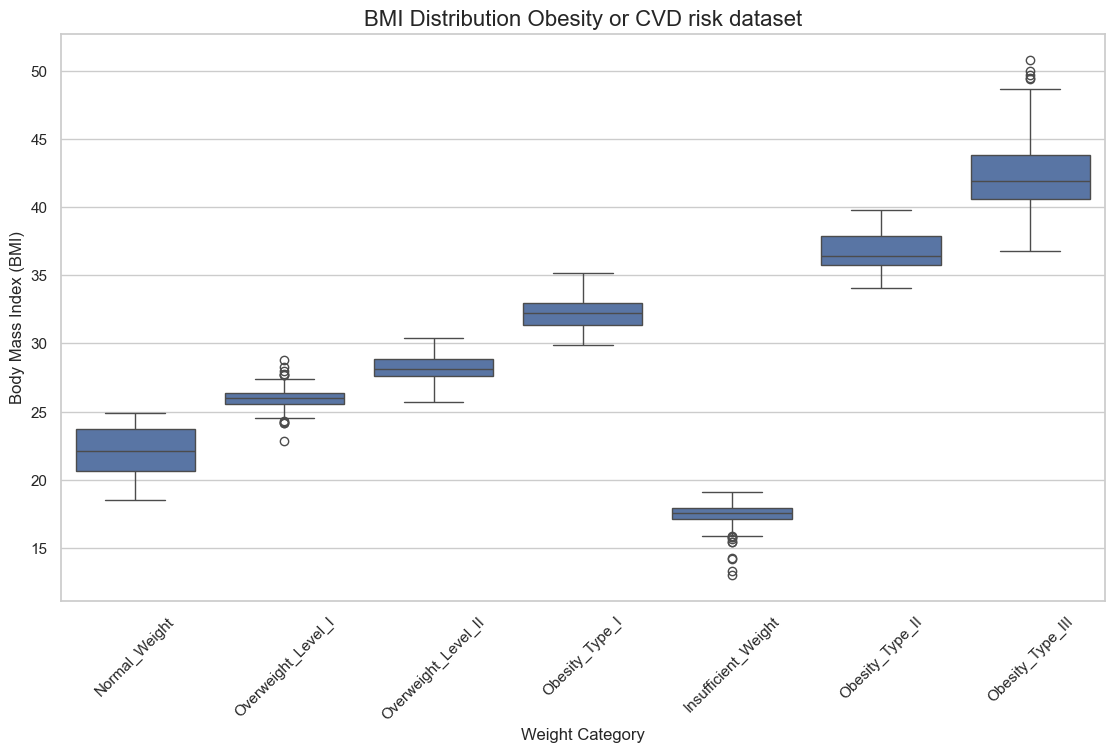

In [94]:
plt.figure(figsize=(12, 7))
ax = sns.boxplot(data=original_df, x='WeightCategory', y='BMI')
ax.set_title('BMI Distribution Obesity or CVD risk dataset', fontsize=16)
ax.set_xlabel('Weight Category', fontsize=12)
ax.set_ylabel('Body Mass Index (BMI)', fontsize=12)
ax.tick_params(axis='x', rotation=45)

plt.show()

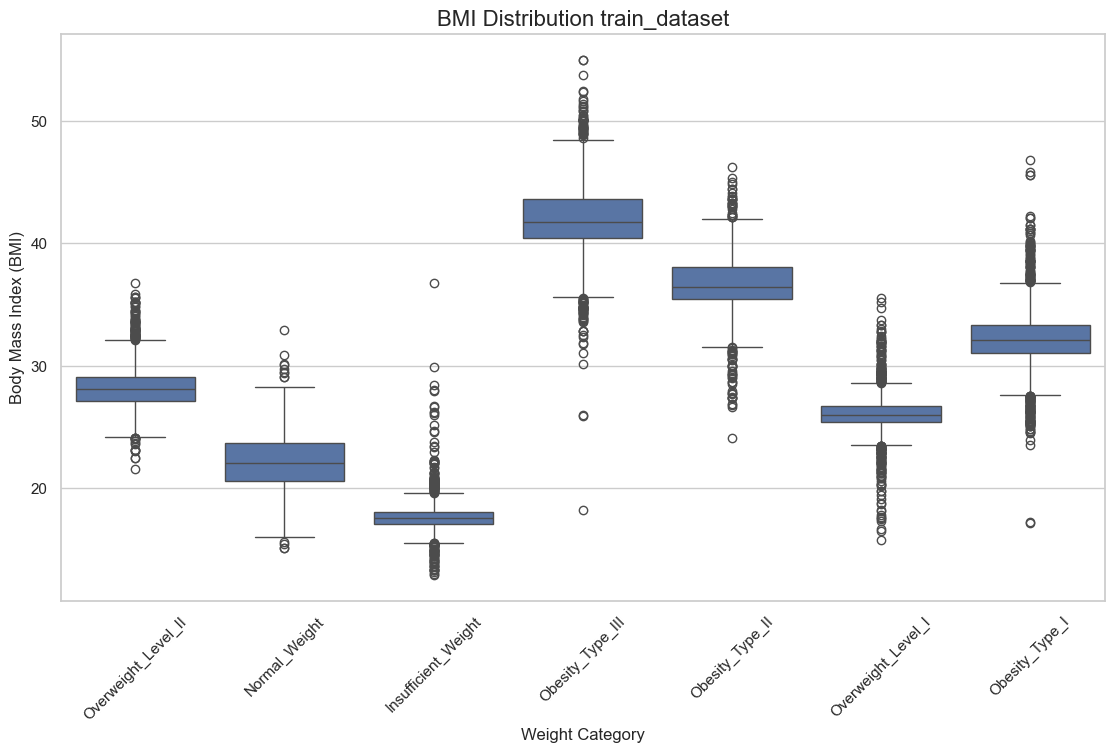

In [95]:
plt.figure(figsize=(12, 7))
ax = sns.boxplot(data=train_df, x='WeightCategory', y='BMI')
ax.set_title('BMI Distribution train_dataset', fontsize=16)
ax.set_xlabel('Weight Category', fontsize=12)
ax.set_ylabel('Body Mass Index (BMI)', fontsize=12)
ax.tick_params(axis='x', rotation=45)

plt.show()

In [96]:
original_df.groupby('WeightCategory')['BMI'].agg(['min', 'max']).sort_values('min')

,min,max
WeightCategory,,
Insufficient_Weight,12.998685,19.082206
Normal_Weight,18.491124,24.913495
Overweight_Level_I,22.826739,28.769607
Overweight_Level_II,25.713513,30.362877
Obesity_Type_I,29.911958,35.171095
Obesity_Type_II,34.048509,39.786652
Obesity_Type_III,36.774400,50.811753


In [97]:
original_df[['Height', 'Weight', 'WeightCategory']]

,Height,Weight,WeightCategory
0,1.620000,64.000000,Normal_Weight
1,1.520000,56.000000,Normal_Weight
2,1.800000,77.000000,Normal_Weight
3,1.800000,87.000000,Overweight_Level_I
4,1.780000,89.800000,Overweight_Level_II
...,...,...,...
2106,1.710730,131.408528,Obesity_Type_III
2107,1.748584,133.742943,Obesity_Type_III
2108,1.752206,133.689352,Obesity_Type_III
2109,1.739450,133.346641,Obesity_Type_III


## Bivariate Analysis
Since weightcategory is our target variable we will be plotting all other columns against our 'weightcategory' column.

**Checking numerical features for correlation.**

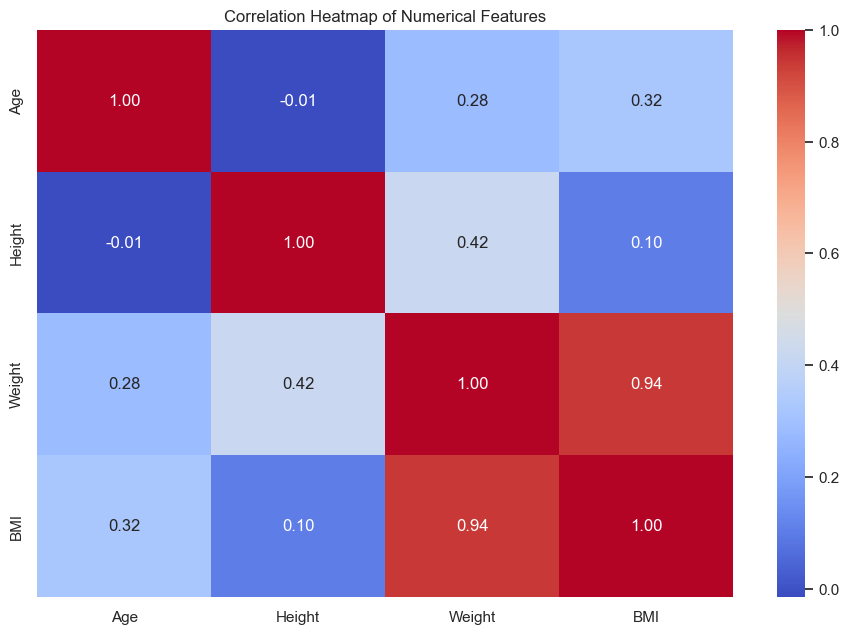

In [98]:
numerical_features = ['Age', 'Height', 'Weight', 'BMI'] 
corr_matrix = train_df[numerical_features].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt=".2f")      
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

***There is high collinearity between 'Weight' and 'BMI'. But since tree based models are immune to multi collinearity we keep both 
'weight' and 'BMI' columns. But we remove the 'weight' column if we are training a Naive Bayes classifier***

**Age vs Weight Category**

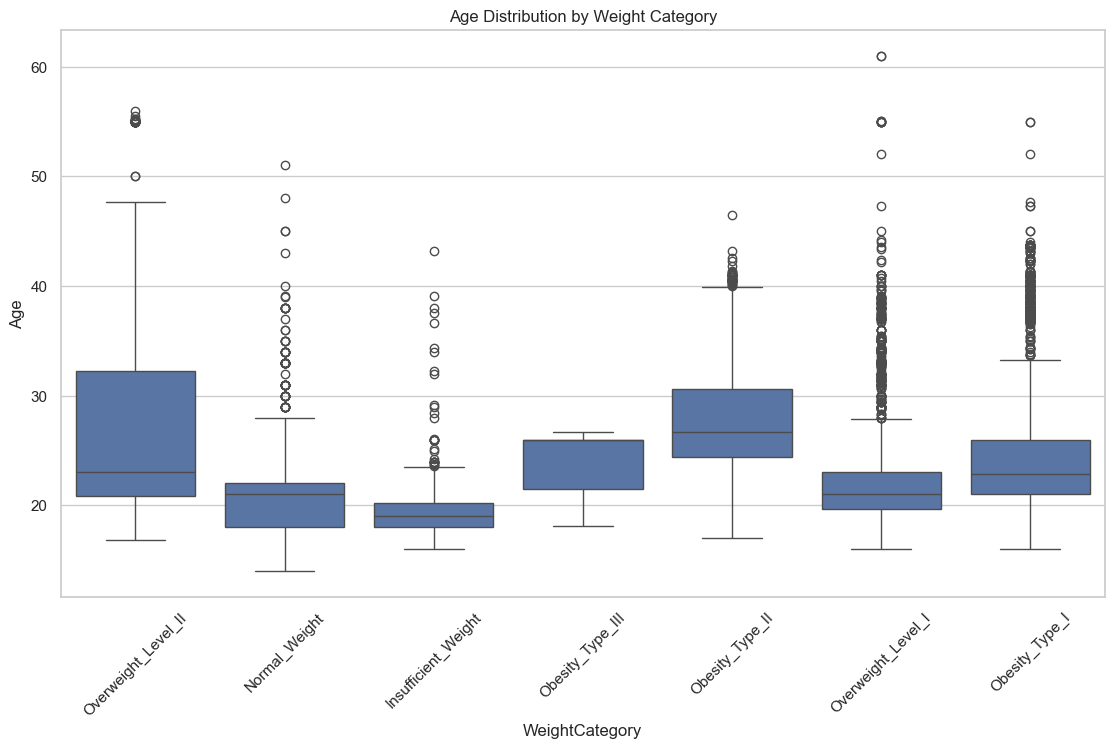

In [99]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=train_df, x='WeightCategory', y='Age')
plt.title('Age Distribution by Weight Category')
plt.xticks(rotation=45)
plt.show()

In [100]:
train_df[train_df['Age'] > 41].sort_values(by='Age', ascending=False)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory,BMI
10274,10274,Male,61.000000,1.750000,76.000000,yes,no,2,3,Frequently,no,2,no,2,1,Frequently,Automobile,Overweight_Level_I,24.816327
5646,5646,Male,61.000000,1.750000,79.000000,yes,yes,3,3,Sometimes,no,2,no,2,0,Sometimes,Automobile,Overweight_Level_I,25.795918
11463,11463,Male,56.000000,1.650000,80.000000,yes,yes,3,3,Sometimes,no,2,no,0,0,no,Automobile,Overweight_Level_II,29.384757
12645,12645,Male,55.493687,1.681021,80.469928,yes,yes,2,1,Sometimes,no,2,no,1,0,no,Automobile,Overweight_Level_II,28.476548
56,56,Male,55.272573,1.700000,80.000000,yes,yes,3,3,Sometimes,no,2,no,1,2,no,Automobile,Overweight_Level_II,27.681661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3174,3174,Female,41.318302,1.624390,80.000000,yes,yes,2,3,Sometimes,no,1,no,0,0,Sometimes,Automobile,Obesity_Type_I,30.318616
10255,10255,Male,41.318302,1.698829,99.605527,yes,yes,3,3,Sometimes,no,1,no,1,0,no,Automobile,Obesity_Type_II,34.513111
12361,12361,Female,41.318302,1.567915,77.053948,yes,yes,2,3,Sometimes,no,1,no,0,0,Sometimes,Automobile,Obesity_Type_I,31.343671
11748,11748,Male,41.220175,1.765690,117.861590,yes,yes,3,3,Sometimes,no,2,no,1,1,no,Automobile,Obesity_Type_II,37.804490


**conclusions**
- Outliers are present in all weight categories , but found to be real data.
- Almost all of the poeple with insufficent_weight are aged under 20.
- overweight_level_ll has the highest distribution among all age categories.

**Height vs Weight Category**

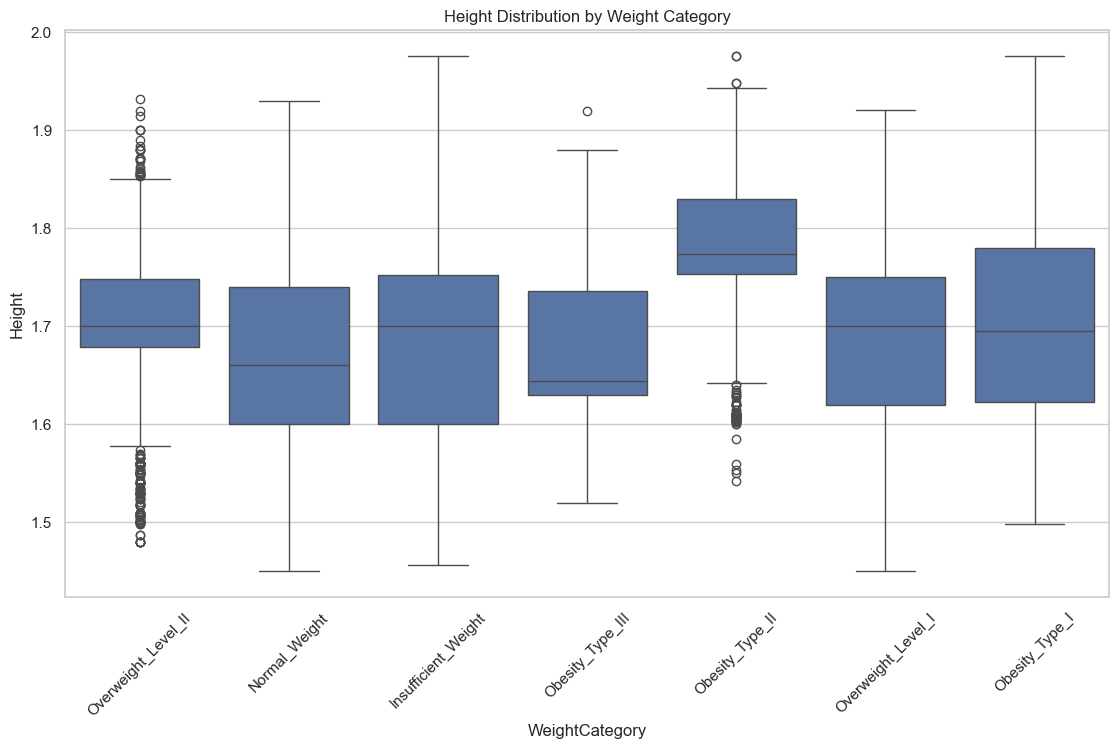

In [101]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=train_df, x='WeightCategory', y='Height')
plt.title('Height Distribution by Weight Category')
plt.xticks(rotation=45) 
plt.show()

In [102]:
train_df[train_df['Height'] > 1.93].sort_values(by='Height', ascending=False)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory,BMI
1271,1271,Male,30.717727,1.975663,125.117633,yes,yes,3,3,Sometimes,yes,1,no,1,0,Sometimes,Public_Transportation,Obesity_Type_II,32.054779
4084,4084,Male,20.491475,1.975663,53.783977,yes,yes,2,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Insufficient_Weight,13.779301
11718,11718,Male,18.000000,1.975663,108.413119,yes,yes,2,2,Sometimes,no,3,no,1,0,no,Public_Transportation,Obesity_Type_I,27.775130
7272,7272,Male,30.702559,1.975663,120.775439,yes,yes,2,3,Sometimes,no,2,no,1,1,Sometimes,Automobile,Obesity_Type_II,30.942321
4220,4220,Male,30.796260,1.947406,118.332966,yes,yes,2,1,Sometimes,no,2,no,1,1,Sometimes,Automobile,Obesity_Type_II,31.202741
15146,15146,Male,29.906575,1.947406,123.721352,yes,yes,2,3,Sometimes,yes,2,no,1,0,Sometimes,Automobile,Obesity_Type_II,32.623582
5348,5348,Male,20.000000,1.947406,60.000000,yes,yes,2,4,Sometimes,no,2,no,3,0,Sometimes,Public_Transportation,Insufficient_Weight,15.821157
10671,10671,Male,18.181821,1.942725,121.657979,yes,yes,3,2,Sometimes,no,3,no,1,0,Sometimes,Public_Transportation,Obesity_Type_II,32.234277
1293,1293,Male,20.586978,1.942725,104.988925,yes,yes,2,3,Sometimes,no,3,no,3,1,no,Public_Transportation,Obesity_Type_I,27.817675
4343,4343,Male,30.357745,1.942725,128.114161,yes,yes,3,3,Sometimes,no,1,no,1,1,Sometimes,Automobile,Obesity_Type_II,33.944896


In [103]:
train_df[(train_df['Height'] > 1.9) & (train_df['WeightCategory']== 'Obesity_Type_III')]

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory,BMI
14199,14199,Female,20.952737,1.918859,129.966428,yes,yes,3,3,Sometimes,no,1,no,2,1,Sometimes,Public_Transportation,Obesity_Type_III,35.29759


**conclusions**
- Outliers are present in insufficient_weight ,obesity_type_ll and overweight_level_ll categories , but found to be real data.
- People of all height ranges are almost evenly distributed among all weight categories

**BMI vs Weight Category**

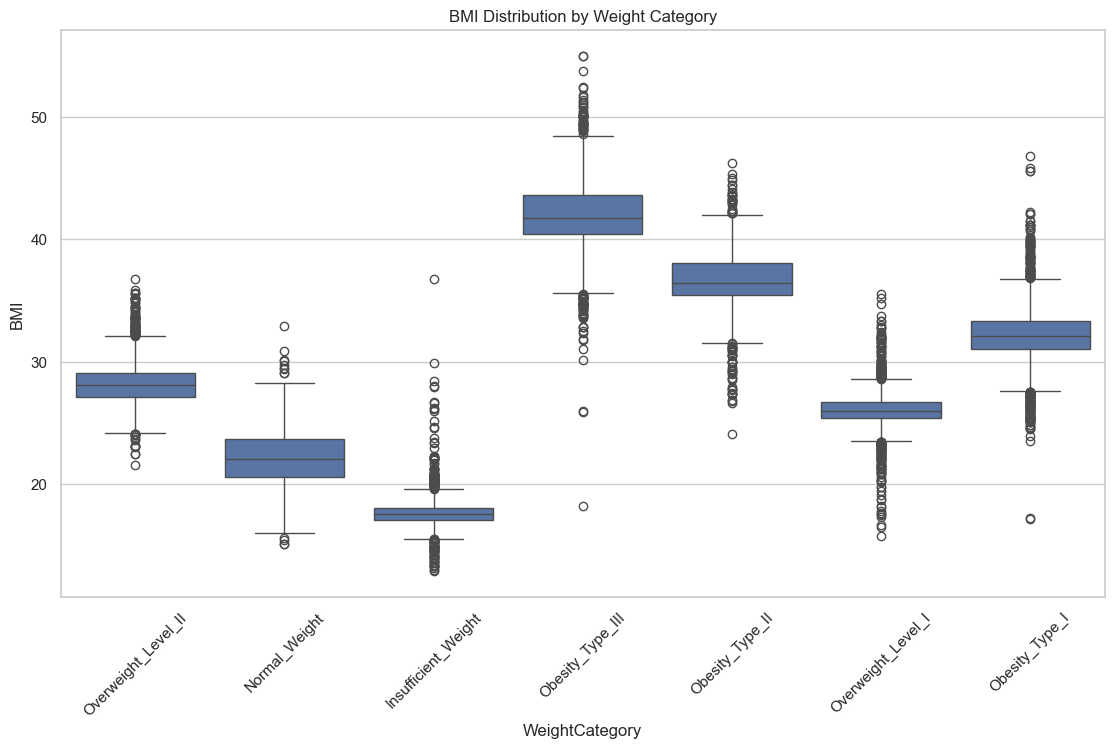

In [104]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=train_df, x='WeightCategory', y='BMI')
plt.title('BMI Distribution by Weight Category')
plt.xticks(rotation=45) 
plt.show()

In [105]:
train_df[(train_df['BMI'] > 35) & (train_df['WeightCategory']== 'Insufficient_Weight')]

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory,BMI
8742,8742,Male,28.421533,1.758382,113.714521,yes,yes,1,4,Sometimes,no,2,no,2,1,Sometimes,Automobile,Insufficient_Weight,36.778115


**conclusions**
- Outliers are present in all weight categories.

**Frequent consumption of high caloric food (FAVC) vs Weight Category**

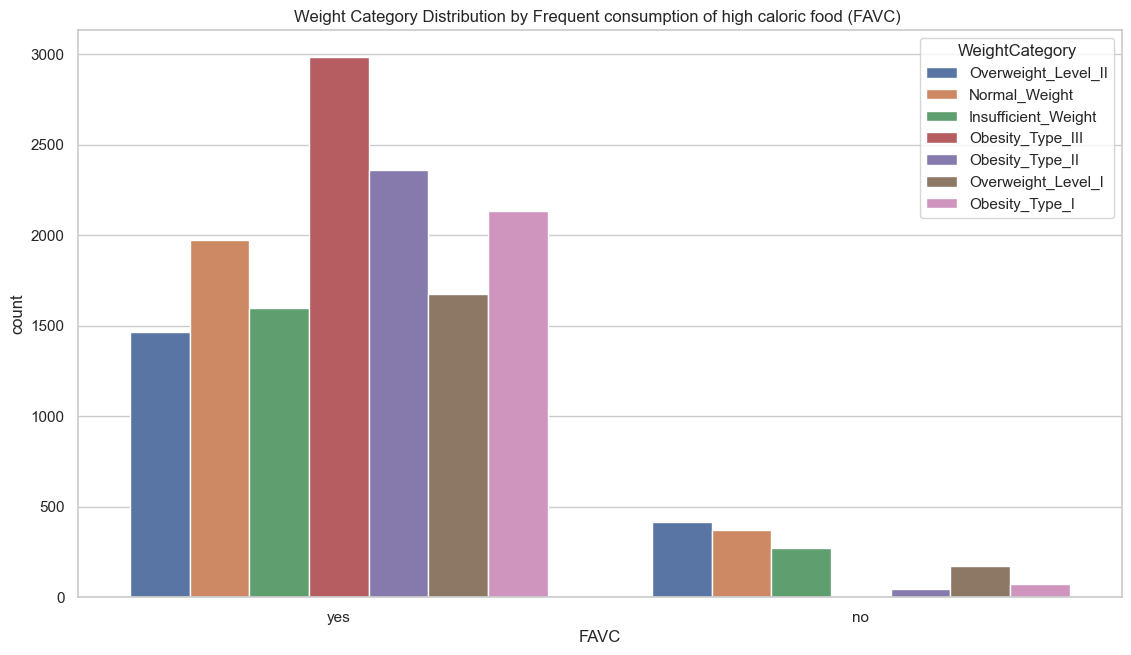

In [109]:
plt.figure(figsize=(12, 7))
sns.countplot(data=train_df, x='FAVC', hue='WeightCategory')
plt.title('Weight Category Distribution by Frequent consumption of high caloric food (FAVC) ')
plt.show()

In [111]:
pd.crosstab(train_df['WeightCategory'],train_df['FAVC'])

FAVC,no,yes
WeightCategory,,
Insufficient_Weight,274,1596
Normal_Weight,371,1974
Obesity_Type_I,72,2135
Obesity_Type_II,43,2360
Obesity_Type_III,1,2982
Overweight_Level_I,171,1673
Overweight_Level_II,417,1464


In [112]:
(pd.crosstab(train_df['WeightCategory'],train_df['FAVC'],normalize = 'columns')*100)

FAVC,no,yes
WeightCategory,,
Insufficient_Weight,20.311342,11.252115
Normal_Weight,27.501853,13.917090
Obesity_Type_I,5.337287,15.052171
Obesity_Type_II,3.187546,16.638466
Obesity_Type_III,0.074129,21.023689
Overweight_Level_I,12.676056,11.794980
Overweight_Level_II,30.911787,10.321489


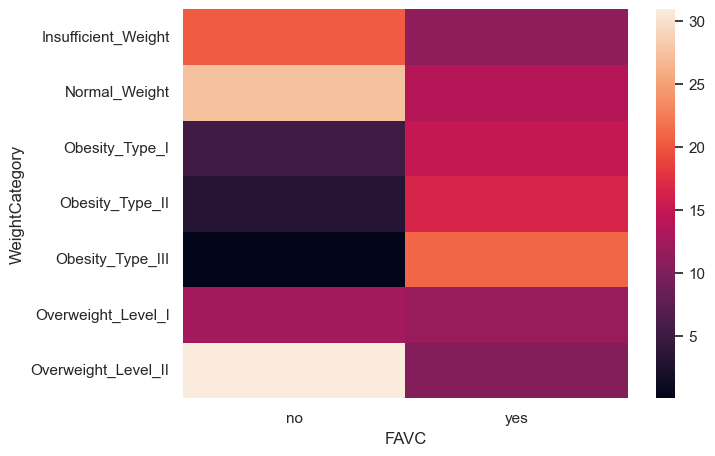

In [113]:
sns.heatmap(pd.crosstab(train_df['WeightCategory'],train_df['FAVC'],normalize = 'columns')*100)
plt.show()

**conclusions**
- Obesity_Type_I, II and III is minimal in 'no' responses, whereas they are the dominant bars in those with response 'yes'.
- Normal weight and overweight_level_II comprise almost 60% of 'no' response.

**Frequency of consumption of vegetables (FCVC) vs Weight Category**

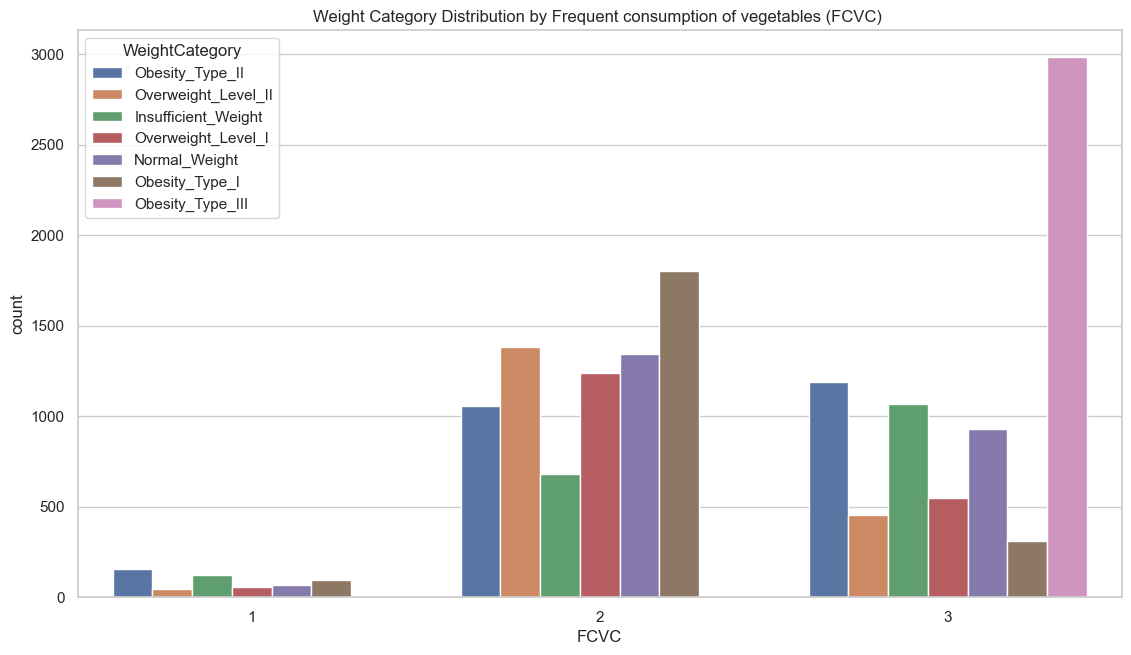

In [115]:
plt.figure(figsize=(12, 7))
sns.countplot(data=train_df, x='FCVC', hue='WeightCategory')
plt.title('Weight Category Distribution by Frequent consumption of vegetables (FCVC) ')
plt.show()

In [116]:
pd.crosstab(train_df['WeightCategory'],train_df['FCVC'])

FCVC,1,2,3
WeightCategory,,,
Insufficient_Weight,125,680,1065
Normal_Weight,70,1344,931
Obesity_Type_I,94,1803,310
Obesity_Type_II,155,1059,1189
Obesity_Type_III,0,0,2983
Overweight_Level_I,54,1239,551
Overweight_Level_II,45,1382,454


In [117]:
(pd.crosstab(train_df['WeightCategory'],train_df['FCVC'],normalize = 'columns')*100)

FCVC,1,2,3
WeightCategory,,,
Insufficient_Weight,23.020258,9.058212,14.232260
Normal_Weight,12.891344,17.903290,12.441534
Obesity_Type_I,17.311234,24.017584,4.142724
Obesity_Type_II,28.545120,14.106834,15.889349
Obesity_Type_III,0.000000,0.000000,39.863691
Overweight_Level_I,9.944751,16.504596,7.363357
Overweight_Level_II,8.287293,18.409484,6.067085


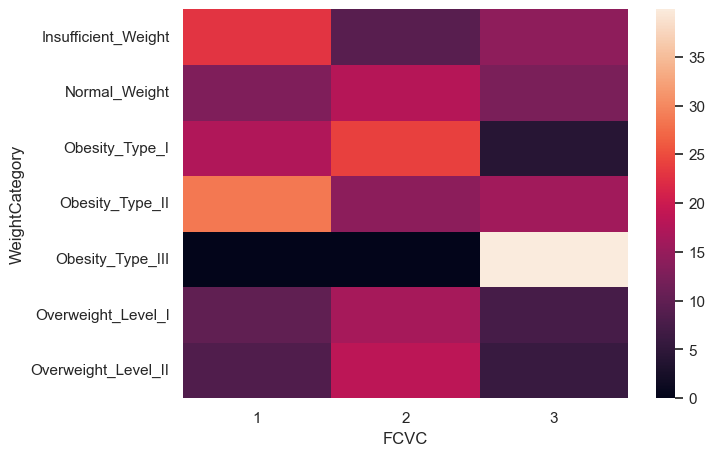

In [118]:
sns.heatmap(pd.crosstab(train_df['WeightCategory'],train_df['FCVC'],normalize = 'columns')*100)
plt.show()

**conclusions**
- Frequent consumption of vegitables(FCVC) with response 2 has more Obesity_Type_I. 
- Only those with response '3' have  obesity_type_III
- Obesity_Type_II in FCVC 2 followed 3
- Overweight_Level_II in FCVC 2 followed by 3

**Number of main meals (NCP) vs Weight Category**

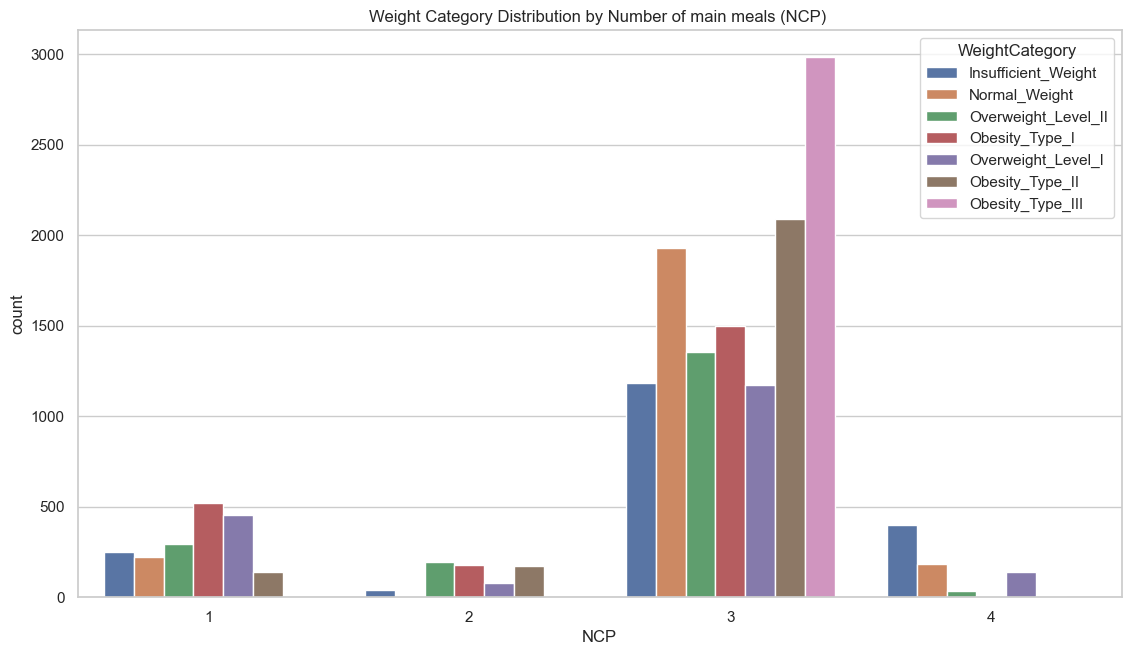

In [119]:
plt.figure(figsize=(12, 7))
sns.countplot(data=train_df, x='NCP', hue='WeightCategory')
plt.title('Weight Category Distribution by Number of main meals (NCP) ')
plt.show()

In [120]:
pd.crosstab(train_df['WeightCategory'],train_df['NCP'])

NCP,1,2,3,4
WeightCategory,,,,
Insufficient_Weight,252,38,1182,398
Normal_Weight,222,6,1932,185
Obesity_Type_I,522,179,1497,9
Obesity_Type_II,139,170,2088,6
Obesity_Type_III,0,0,2983,0
Overweight_Level_I,456,78,1171,139
Overweight_Level_II,296,192,1357,36


In [121]:
(pd.crosstab(train_df['WeightCategory'],train_df['NCP'],normalize = 'columns')*100)

NCP,1,2,3,4
WeightCategory,,,,
Insufficient_Weight,13.354531,5.731523,9.680590,51.487710
Normal_Weight,11.764706,0.904977,15.823096,23.932730
Obesity_Type_I,27.662957,26.998492,12.260442,1.164295
Obesity_Type_II,7.366190,25.641026,17.100737,0.776197
Obesity_Type_III,0.000000,0.000000,24.430794,0.000000
Overweight_Level_I,24.165342,11.764706,9.590500,17.981889
Overweight_Level_II,15.686275,28.959276,11.113841,4.657180


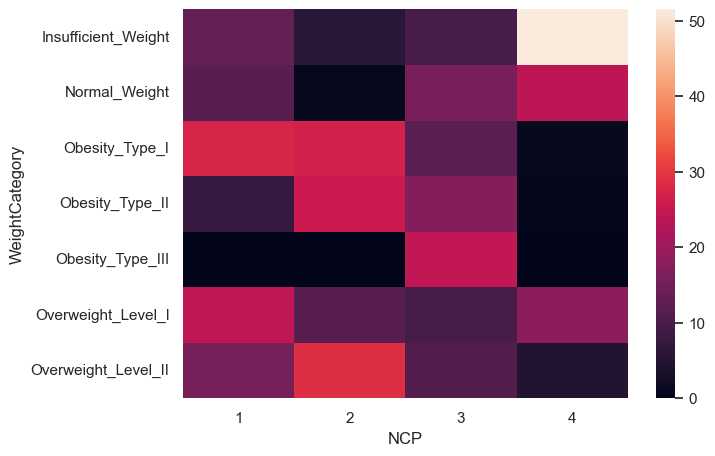

In [122]:
sns.heatmap(pd.crosstab(train_df['WeightCategory'],train_df['NCP'],normalize = 'columns')*100)
plt.show()

**conclusions**
- All the Obesity_type_III are noted for people having 3 main meals. 
- Surprisingly Obesity_Type I,II, and III are almost absent in people having 4 main meals.

**Gender vs Weight Category**

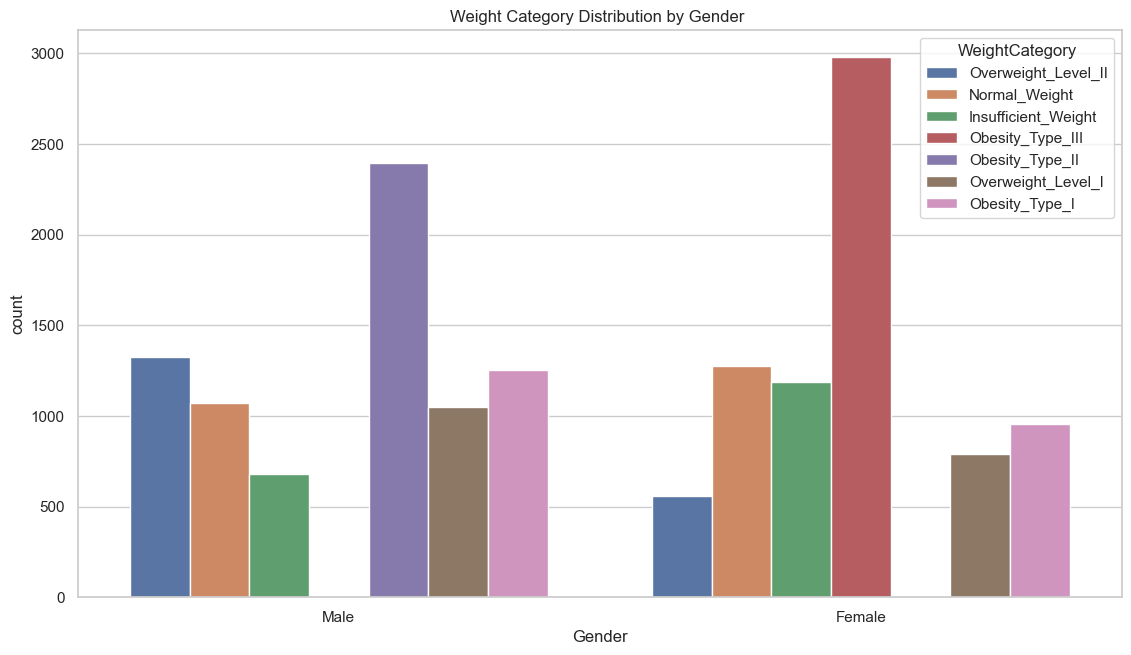

In [123]:
plt.figure(figsize=(12, 7))
sns.countplot(data=train_df, x='Gender', hue='WeightCategory')
plt.title('Weight Category Distribution by Gender ')
plt.show()

In [124]:
pd.crosstab(train_df['WeightCategory'],train_df['Gender'])

Gender,Female,Male
WeightCategory,,
Insufficient_Weight,1188,682
Normal_Weight,1273,1072
Obesity_Type_I,955,1252
Obesity_Type_II,6,2397
Obesity_Type_III,2979,4
Overweight_Level_I,793,1051
Overweight_Level_II,556,1325


In [125]:
(pd.crosstab(train_df['WeightCategory'],train_df['Gender'],normalize = 'columns')*100)

Gender,Female,Male
WeightCategory,,
Insufficient_Weight,15.329032,8.762688
Normal_Weight,16.425806,13.773609
Obesity_Type_I,12.322581,16.086342
Obesity_Type_II,0.077419,30.797893
Obesity_Type_III,38.438710,0.051394
Overweight_Level_I,10.232258,13.503790
Overweight_Level_II,7.174194,17.024284


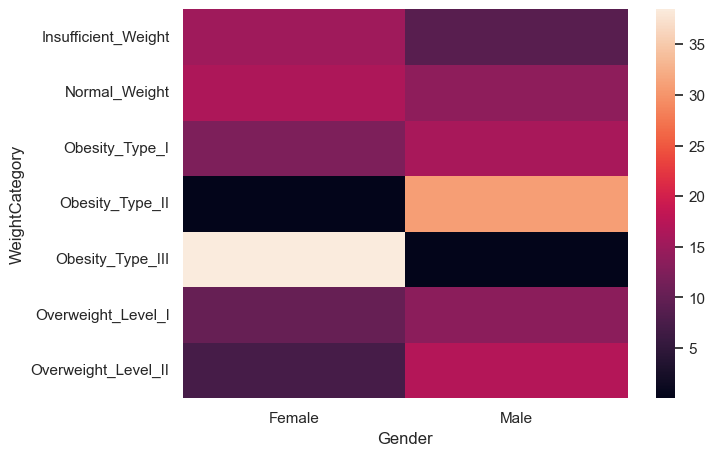

In [126]:
sns.heatmap(pd.crosstab(train_df['WeightCategory'],train_df['Gender'],normalize = 'columns')*100)
plt.show()

**conclusions**
- Males are more prone to Obesity_Type_II
- Females are prone to Obesity_Type_III

**Consumption of food between meals (CAEC) vs Weight Category**

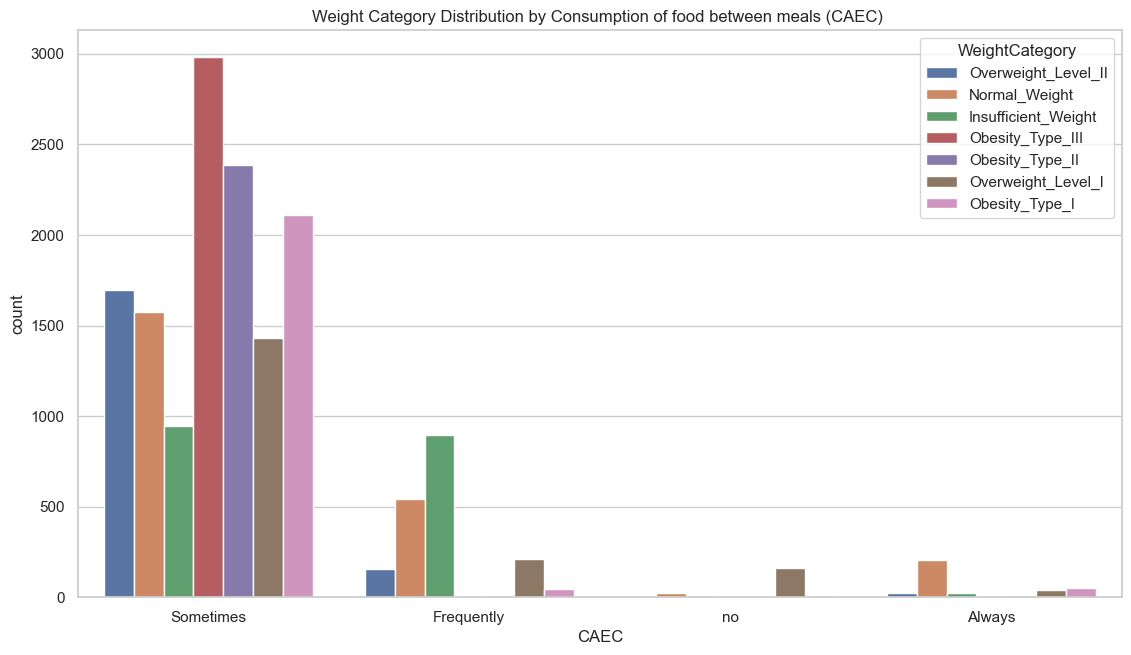

In [127]:
plt.figure(figsize=(12, 7))
sns.countplot(data=train_df, x='CAEC', hue='WeightCategory')
plt.title('Weight Category Distribution by Consumption of food between meals (CAEC) ')
plt.show()

In [128]:
pd.crosstab(train_df['WeightCategory'],train_df['CAEC'])

CAEC,Always,Frequently,Sometimes,no
WeightCategory,,,,
Insufficient_Weight,22,897,946,5
Normal_Weight,205,542,1573,25
Obesity_Type_I,50,43,2109,5
Obesity_Type_II,7,8,2386,2
Obesity_Type_III,1,1,2981,0
Overweight_Level_I,40,209,1433,162
Overweight_Level_II,21,158,1698,4


In [129]:
(pd.crosstab(train_df['WeightCategory'],train_df['CAEC'],normalize = 'columns')*100)

CAEC,Always,Frequently,Sometimes,no
WeightCategory,,,,
Insufficient_Weight,6.358382,48.277718,7.207070,2.463054
Normal_Weight,59.248555,29.171152,11.983849,12.315271
Obesity_Type_I,14.450867,2.314316,16.067347,2.463054
Obesity_Type_II,2.023121,0.430571,18.177663,0.985222
Obesity_Type_III,0.289017,0.053821,22.710651,0.000000
Overweight_Level_I,11.560694,11.248654,10.917263,79.802956
Overweight_Level_II,6.069364,8.503767,12.936157,1.970443


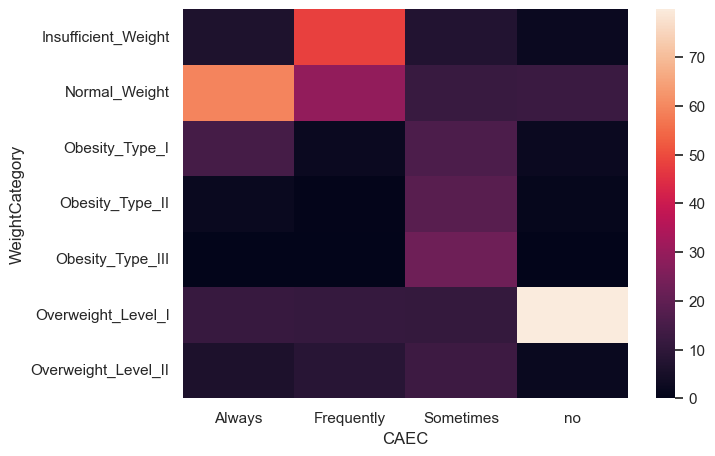

In [130]:
sns.heatmap(pd.crosstab(train_df['WeightCategory'],train_df['CAEC'],normalize = 'columns')*100)
plt.show()

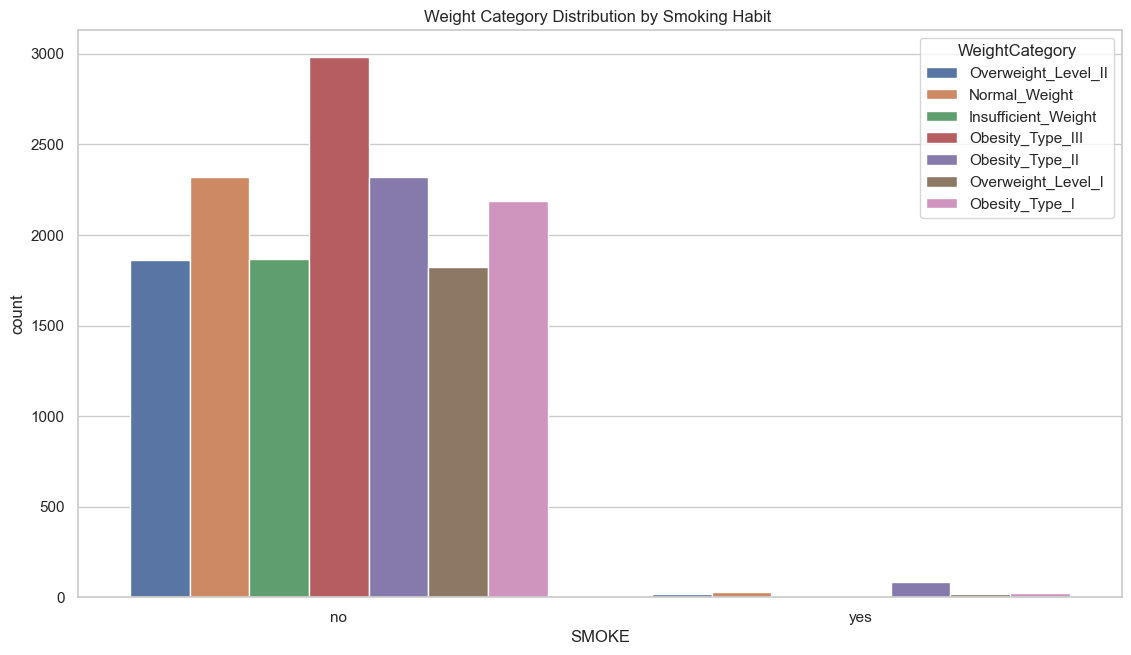

In [131]:
plt.figure(figsize=(12, 7))
sns.countplot(data=train_df, x='SMOKE', hue='WeightCategory')
plt.title('Weight Category Distribution by Smoking Habit ')
plt.show()

In [132]:
pd.crosstab(train_df['WeightCategory'],train_df['SMOKE'])

SMOKE,no,yes
WeightCategory,,
Insufficient_Weight,1865,5
Normal_Weight,2318,27
Obesity_Type_I,2186,21
Obesity_Type_II,2319,84
Obesity_Type_III,2981,2
Overweight_Level_I,1825,19
Overweight_Level_II,1862,19


In [133]:
(pd.crosstab(train_df['WeightCategory'],train_df['SMOKE'],normalize = 'columns')*100)

SMOKE,no,yes
WeightCategory,,
Insufficient_Weight,12.145090,2.824859
Normal_Weight,15.095077,15.254237
Obesity_Type_I,14.235478,11.864407
Obesity_Type_II,15.101589,47.457627
Obesity_Type_III,19.412607,1.129944
Overweight_Level_I,11.884605,10.734463
Overweight_Level_II,12.125554,10.734463


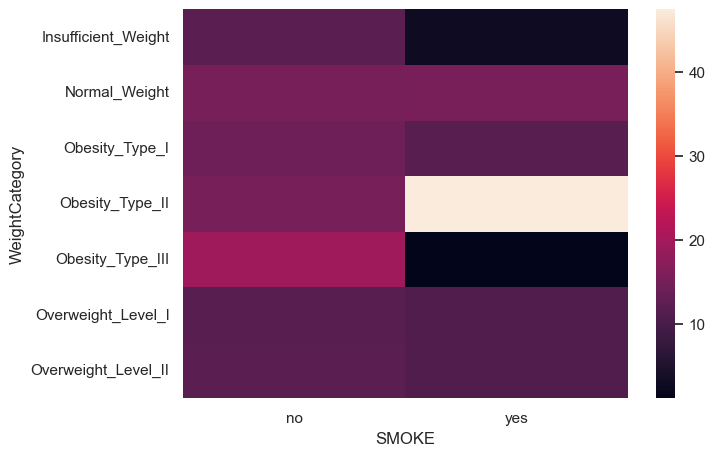

In [134]:
sns.heatmap(pd.crosstab(train_df['WeightCategory'],train_df['SMOKE'],normalize = 'columns')*100)
plt.show()

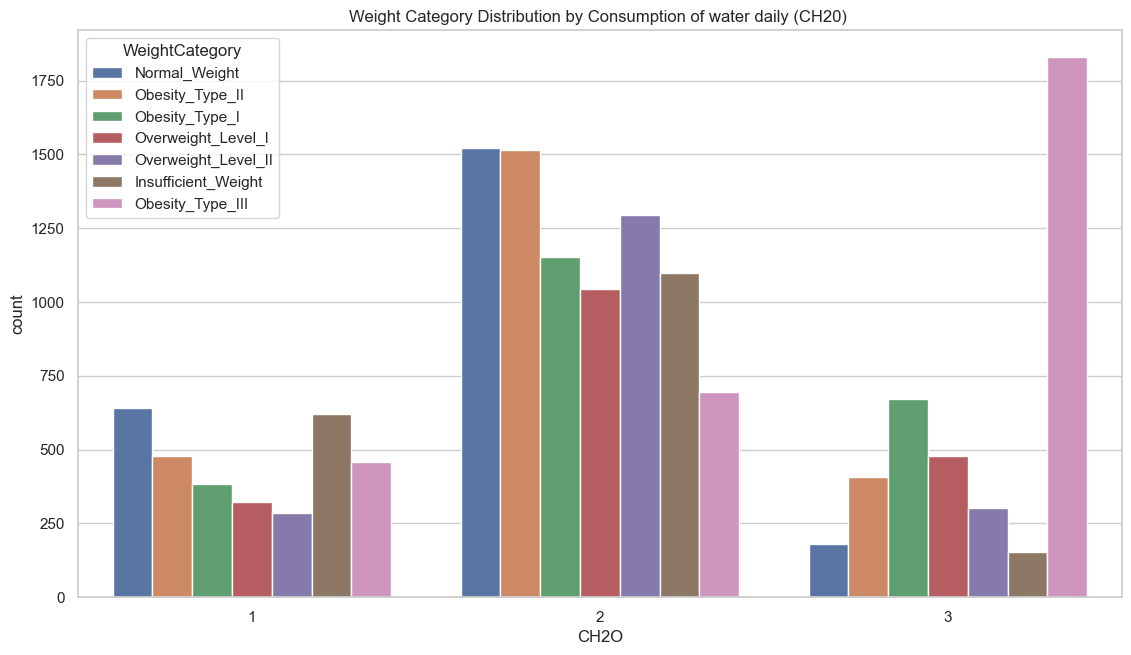

In [135]:
plt.figure(figsize=(12, 7))
sns.countplot(data=train_df, x='CH2O', hue='WeightCategory')
plt.title('Weight Category Distribution by Consumption of water daily (CH20) ')
plt.show()

In [136]:
pd.crosstab(train_df['WeightCategory'],train_df['CH2O'])

CH2O,1,2,3
WeightCategory,,,
Insufficient_Weight,619,1098,153
Normal_Weight,642,1521,182
Obesity_Type_I,383,1153,671
Obesity_Type_II,479,1516,408
Obesity_Type_III,459,695,1829
Overweight_Level_I,322,1044,478
Overweight_Level_II,284,1296,301


In [137]:
(pd.crosstab(train_df['WeightCategory'],train_df['CH2O'],normalize = 'columns')*100)

CH2O,1,2,3
WeightCategory,,,
Insufficient_Weight,19.416562,13.192359,3.804078
Normal_Weight,20.138018,18.274661,4.525112
Obesity_Type_I,12.013802,13.853178,16.683242
Obesity_Type_II,15.025094,18.214586,10.144207
Obesity_Type_III,14.397742,8.350354,45.474888
Overweight_Level_I,10.100376,12.543554,11.884635
Overweight_Level_II,8.908407,15.571308,7.483839


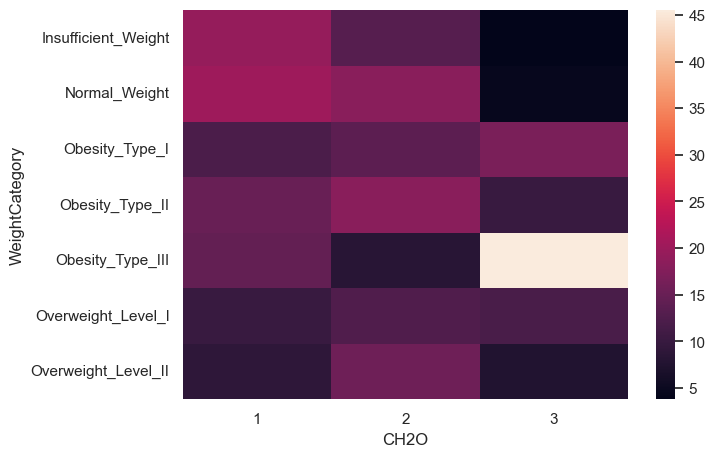

In [138]:
sns.heatmap(pd.crosstab(train_df['WeightCategory'],train_df['CH2O'],normalize = 'columns')*100)
plt.show()

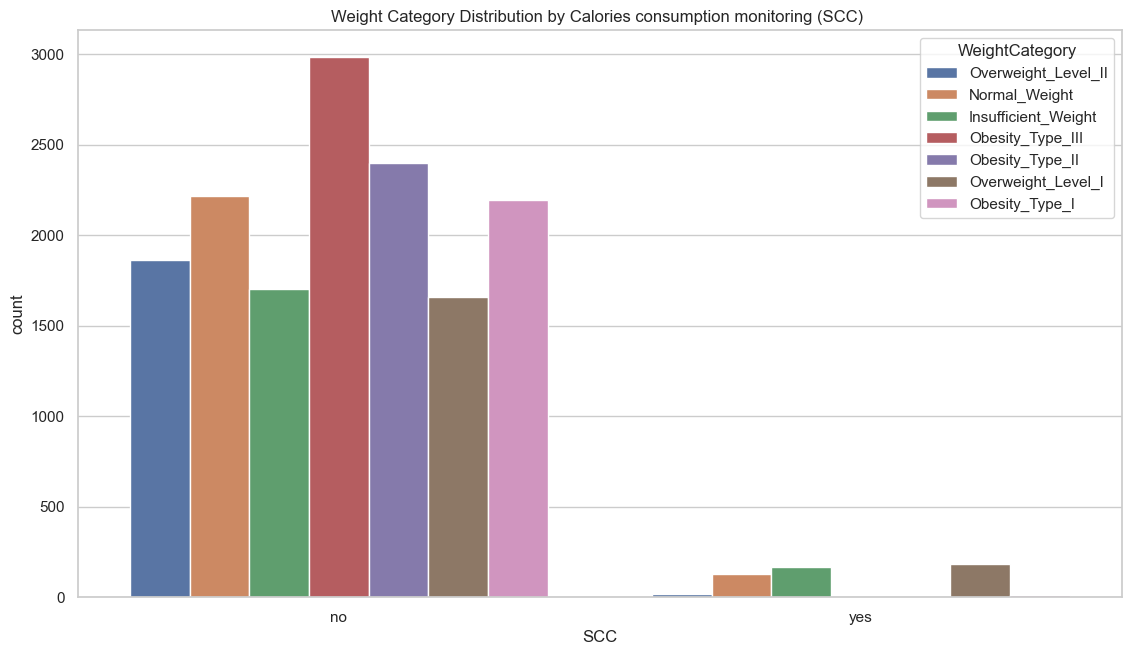

In [139]:
plt.figure(figsize=(12, 7))
sns.countplot(data=train_df, x='SCC', hue='WeightCategory')
plt.title('Weight Category Distribution by Calories consumption monitoring (SCC) ')
plt.show()

In [140]:
pd.crosstab(train_df['WeightCategory'],train_df['SCC'])

SCC,no,yes
WeightCategory,,
Insufficient_Weight,1701,169
Normal_Weight,2217,128
Obesity_Type_I,2194,13
Obesity_Type_II,2399,4
Obesity_Type_III,2983,0
Overweight_Level_I,1661,183
Overweight_Level_II,1864,17


In [141]:
(pd.crosstab(train_df['WeightCategory'],train_df['SCC'],normalize = 'columns')*100)

SCC,no,yes
WeightCategory,,
Insufficient_Weight,11.325654,32.879377
Normal_Weight,14.761302,24.902724
Obesity_Type_I,14.608163,2.529183
Obesity_Type_II,15.973101,0.778210
Obesity_Type_III,19.861509,0.000000
Overweight_Level_I,11.059325,35.603113
Overweight_Level_II,12.410946,3.307393


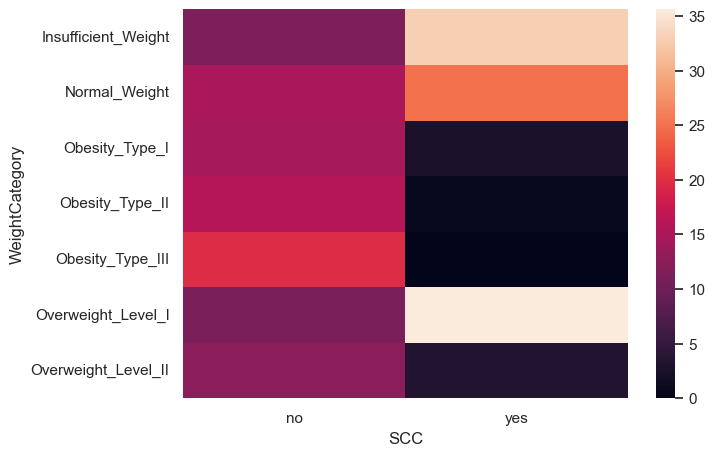

In [142]:
sns.heatmap(pd.crosstab(train_df['WeightCategory'],train_df['SCC'],normalize = 'columns')*100)
plt.show()

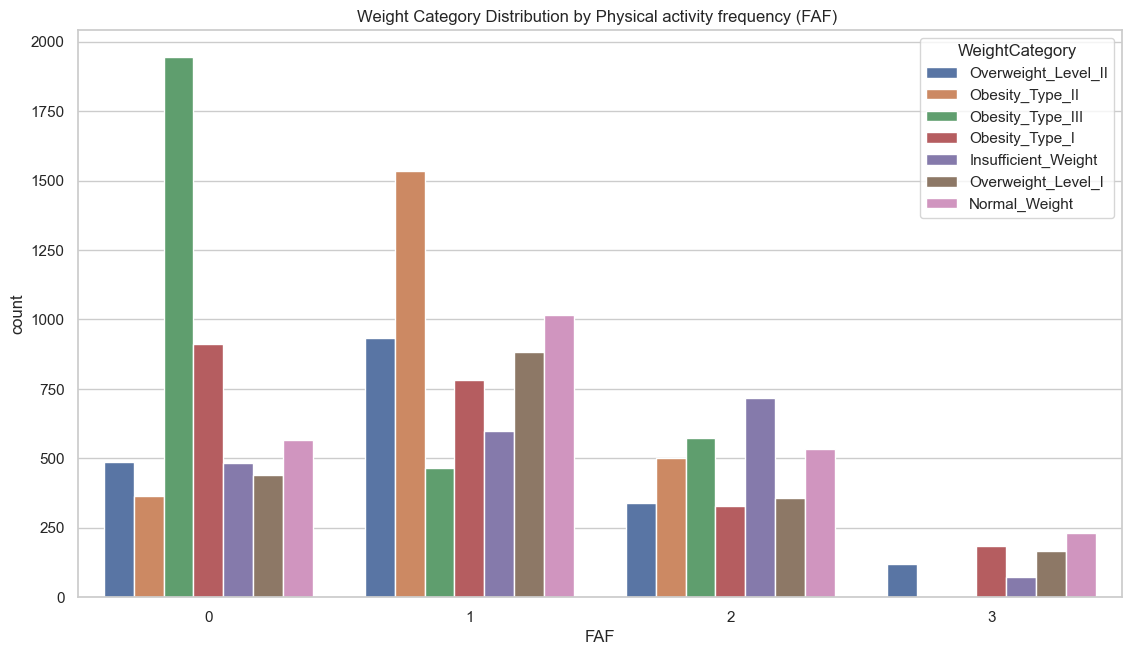

In [143]:
plt.figure(figsize=(12, 7))
sns.countplot(data=train_df, x='FAF', hue='WeightCategory')
plt.title('Weight Category Distribution by Physical activity frequency (FAF) ')
plt.show()

In [144]:
pd.crosstab(train_df['WeightCategory'],train_df['FAF'])

FAF,0,1,2,3
WeightCategory,,,,
Insufficient_Weight,484,597,717,72
Normal_Weight,566,1015,533,231
Obesity_Type_I,913,782,328,184
Obesity_Type_II,366,1534,501,2
Obesity_Type_III,1944,465,573,1
Overweight_Level_I,439,884,356,165
Overweight_Level_II,486,934,341,120


In [145]:
(pd.crosstab(train_df['WeightCategory'],train_df['FAF'],normalize = 'columns')*100)

FAF,0,1,2,3
WeightCategory,,,,
Insufficient_Weight,9.311274,9.611979,21.409376,9.290323
Normal_Weight,10.888803,16.341974,15.915199,29.806452
Obesity_Type_I,17.564448,12.590565,9.793968,23.741935
Obesity_Type_II,7.041170,24.698116,14.959689,0.258065
Obesity_Type_III,37.399000,7.486717,17.109585,0.129032
Overweight_Level_I,8.445556,14.232813,10.630039,21.290323
Overweight_Level_II,9.349750,15.037836,10.182144,15.483871


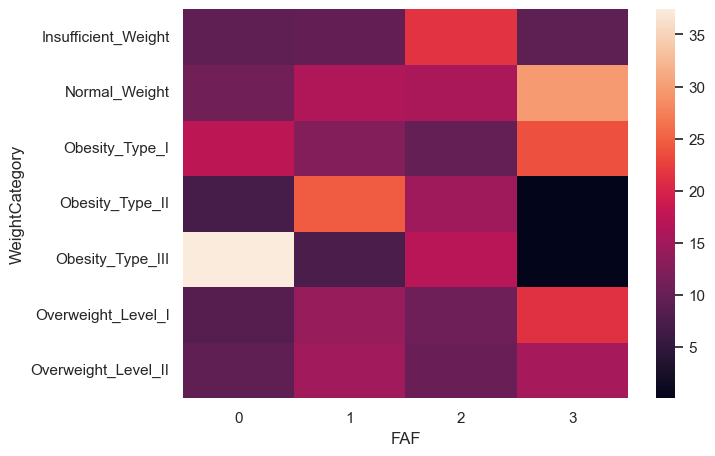

In [146]:
sns.heatmap(pd.crosstab(train_df['WeightCategory'],train_df['FAF'],normalize = 'columns')*100)
plt.show()

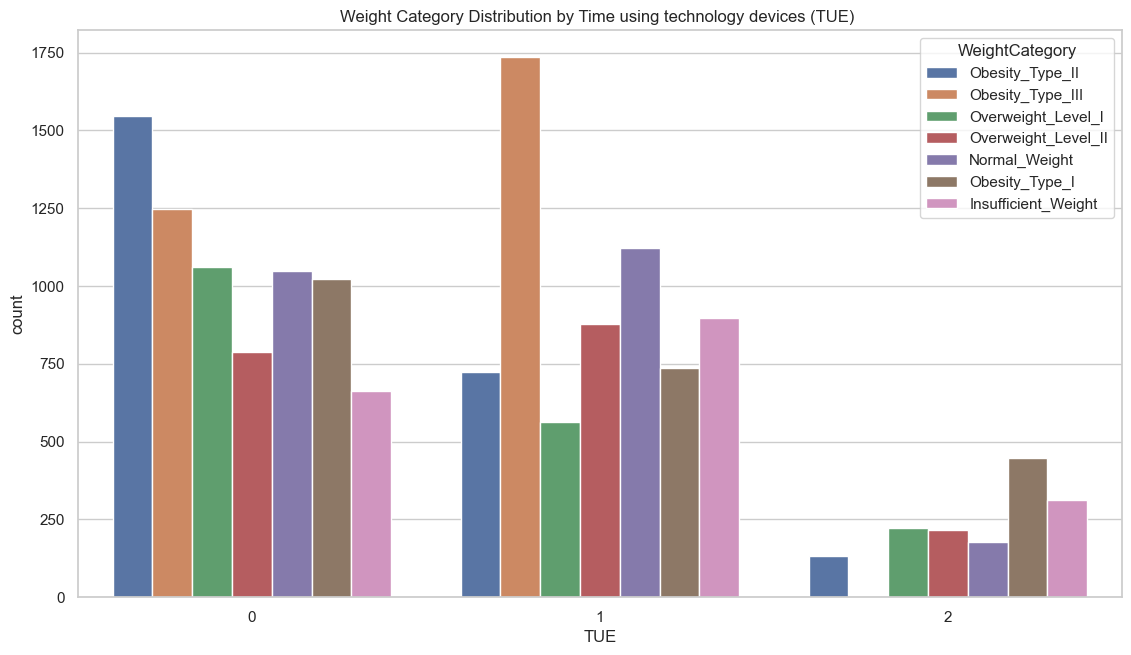

In [147]:
plt.figure(figsize=(12, 7))
sns.countplot(data=train_df, x='TUE', hue='WeightCategory')
plt.title('Weight Category Distribution by Time using technology devices (TUE) ')
plt.show()

In [148]:
pd.crosstab(train_df['WeightCategory'],train_df['TUE'])

TUE,0,1,2
WeightCategory,,,
Insufficient_Weight,662,897,311
Normal_Weight,1047,1121,177
Obesity_Type_I,1023,735,449
Obesity_Type_II,1546,724,133
Obesity_Type_III,1247,1735,1
Overweight_Level_I,1061,562,221
Overweight_Level_II,789,877,215


In [149]:
(pd.crosstab(train_df['WeightCategory'],train_df['TUE'],normalize = 'columns')*100)

TUE,0,1,2
WeightCategory,,,
Insufficient_Weight,8.976271,13.486694,20.637027
Normal_Weight,14.196610,16.854608,11.745189
Obesity_Type_I,13.871186,11.050970,29.794293
Obesity_Type_II,20.962712,10.885581,8.825481
Obesity_Type_III,16.908475,26.086303,0.066357
Overweight_Level_I,14.386441,8.449857,14.664897
Overweight_Level_II,10.698305,13.185987,14.266755


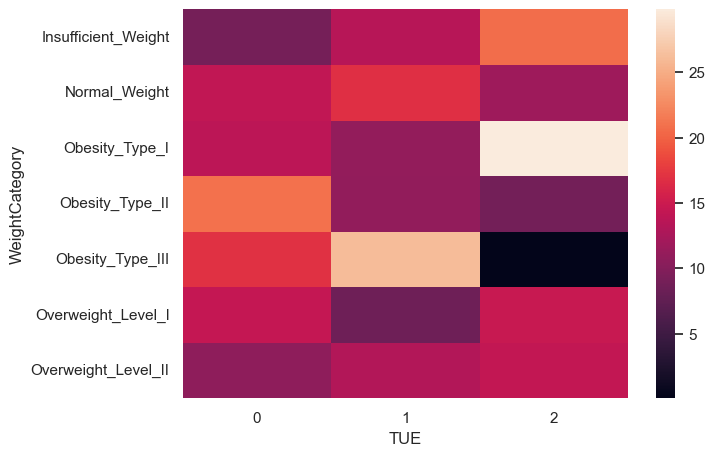

In [150]:
sns.heatmap(pd.crosstab(train_df['WeightCategory'],train_df['TUE'],normalize = 'columns')*100)
plt.show()

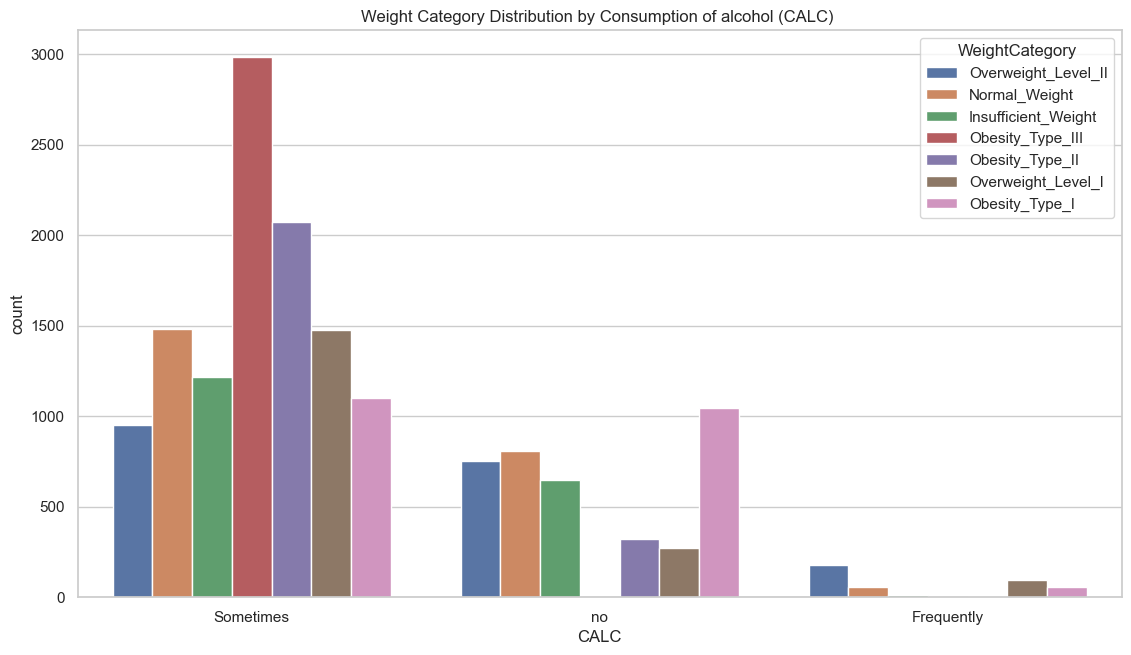

In [151]:
plt.figure(figsize=(12, 7))
sns.countplot(data=train_df, x='CALC', hue='WeightCategory')
plt.title('Weight Category Distribution by Consumption of alcohol (CALC) ')
plt.show()

In [152]:
pd.crosstab(train_df['WeightCategory'],train_df['CALC'])

CALC,Frequently,Sometimes,no
WeightCategory,,,
Insufficient_Weight,10,1215,645
Normal_Weight,56,1483,806
Obesity_Type_I,57,1103,1047
Obesity_Type_II,9,2071,323
Obesity_Type_III,0,2983,0
Overweight_Level_I,97,1477,270
Overweight_Level_II,178,953,750


In [153]:
(pd.crosstab(train_df['WeightCategory'],train_df['CALC'],normalize = 'columns')*100)

CALC,Frequently,Sometimes,no
WeightCategory,,,
Insufficient_Weight,2.457002,10.766504,16.792502
Normal_Weight,13.759214,13.141338,20.984119
Obesity_Type_I,14.004914,9.774036,27.258526
Obesity_Type_II,2.211302,18.351794,8.409268
Obesity_Type_III,0.000000,26.433319,0.000000
Overweight_Level_I,23.832924,13.088170,7.029419
Overweight_Level_II,43.734644,8.444838,19.526165


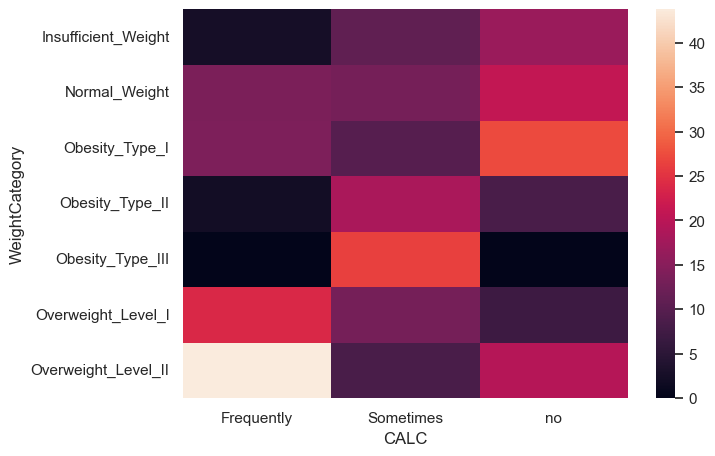

In [154]:
sns.heatmap(pd.crosstab(train_df['WeightCategory'],train_df['CALC'],normalize = 'columns')*100)
plt.show()

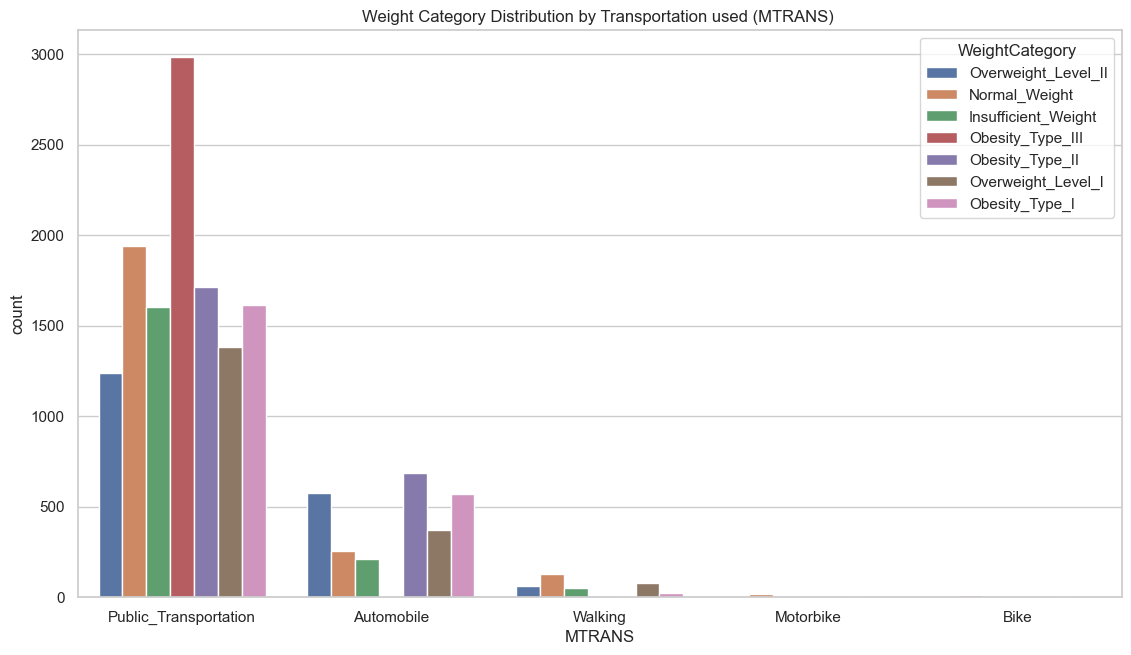

In [155]:
plt.figure(figsize=(12, 7))
sns.countplot(data=train_df, x='MTRANS', hue='WeightCategory')
plt.title('Weight Category Distribution by Transportation used (MTRANS) ')
plt.show()

In [156]:
pd.crosstab(train_df['WeightCategory'],train_df['MTRANS'],normalize = 'columns')*100

MTRANS,Automobile,Bike,Motorbike,Public_Transportation,Walking
WeightCategory,,,,,
Insufficient_Weight,7.943050,4.166667,10.000000,12.846832,15.294118
Normal_Weight,9.516673,45.833333,50.000000,15.541299,37.352941
Obesity_Type_I,21.356313,4.166667,6.666667,12.943063,5.882353
Obesity_Type_II,25.665043,4.166667,6.666667,13.720930,1.176471
Obesity_Type_III,0.000000,0.000000,0.000000,23.921411,0.000000
Overweight_Level_I,13.975272,29.166667,16.666667,11.090617,22.352941
Overweight_Level_II,21.543649,12.500000,10.000000,9.935846,17.941176


In [157]:
pd.crosstab(train_df['WeightCategory'],train_df['MTRANS'])

MTRANS,Automobile,Bike,Motorbike,Public_Transportation,Walking
WeightCategory,,,,,
Insufficient_Weight,212,1,3,1602,52
Normal_Weight,254,11,15,1938,127
Obesity_Type_I,570,1,2,1614,20
Obesity_Type_II,685,1,2,1711,4
Obesity_Type_III,0,0,0,2983,0
Overweight_Level_I,373,7,5,1383,76
Overweight_Level_II,575,3,3,1239,61


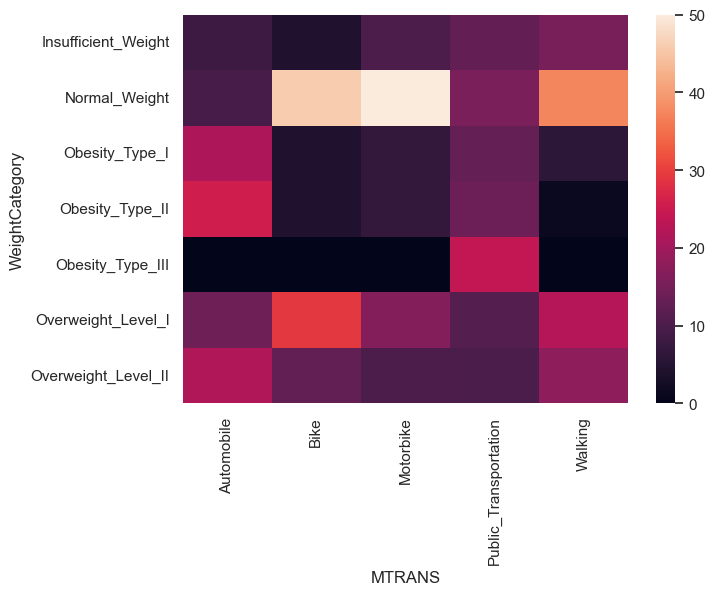

In [158]:
sns.heatmap(pd.crosstab(train_df['WeightCategory'],train_df['MTRANS'],normalize = 'columns')*100)
plt.show()

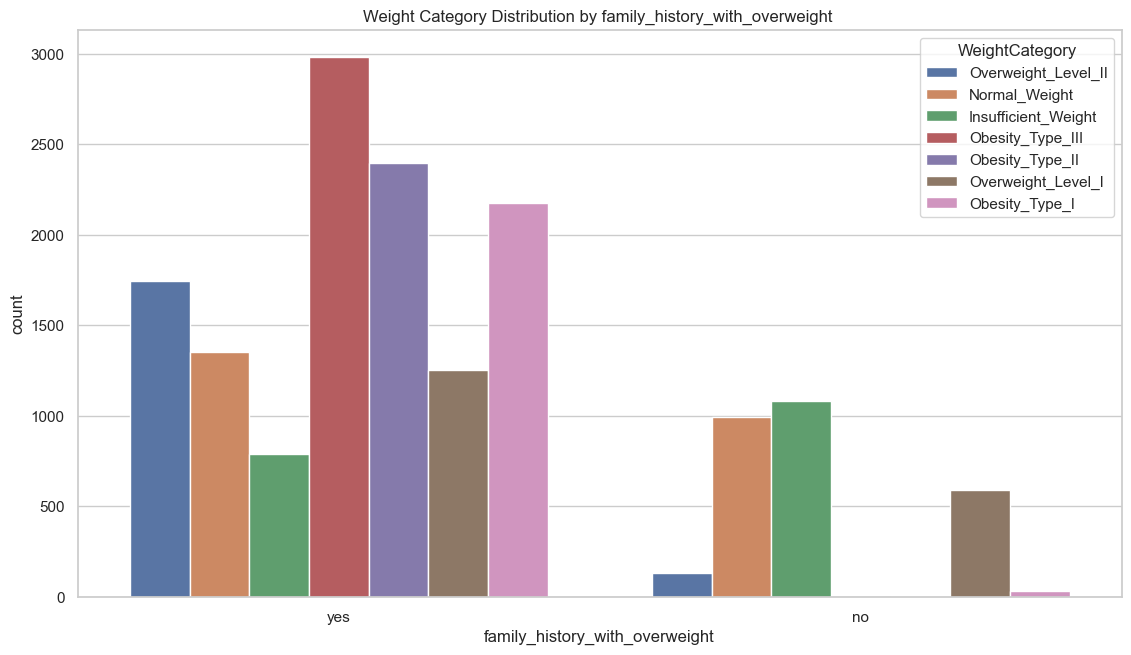

In [159]:
plt.figure(figsize=(12, 7))
sns.countplot(data=train_df, x='family_history_with_overweight', hue='WeightCategory')
plt.title('Weight Category Distribution by family_history_with_overweight ')
plt.show()

In [160]:
pd.crosstab(train_df['WeightCategory'],train_df['family_history_with_overweight'],normalize = 'columns')*100

family_history_with_overweight,no,yes
WeightCategory,,
Insufficient_Weight,38.103631,6.214556
Normal_Weight,34.966514,10.656900
Obesity_Type_I,1.198449,17.115627
Obesity_Type_II,0.176243,18.887839
Obesity_Type_III,0.035249,23.487713
Overweight_Level_I,20.761368,9.885003
Overweight_Level_II,4.758548,13.752363


In [161]:
pd.crosstab(train_df['WeightCategory'],train_df['family_history_with_overweight'])

family_history_with_overweight,no,yes
WeightCategory,,
Insufficient_Weight,1081,789
Normal_Weight,992,1353
Obesity_Type_I,34,2173
Obesity_Type_II,5,2398
Obesity_Type_III,1,2982
Overweight_Level_I,589,1255
Overweight_Level_II,135,1746


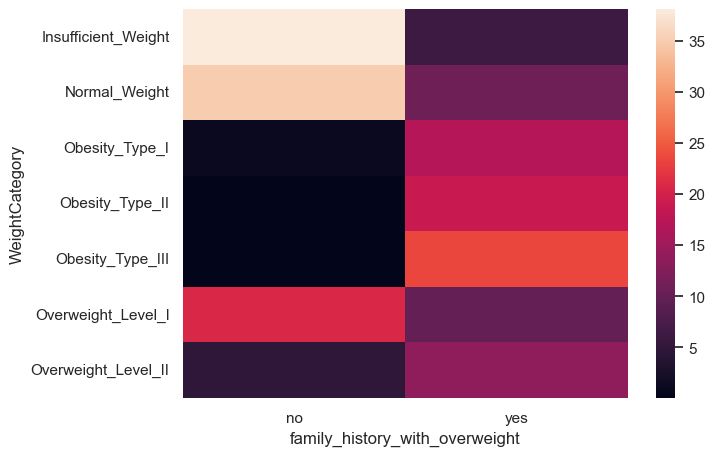

In [162]:
sns.heatmap(pd.crosstab(train_df['WeightCategory'],train_df['family_history_with_overweight'],normalize = 'columns')*100)
plt.show()

***Succesfully completed EDA*** 